In [1]:
# 라이브러리 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 선명하게 표시되도록
%config InlineBackend.figure_format='retina'

#한글 폰트 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) 

In [2]:
%ls data

 D 드라이브의 볼륨: 학생방
 볼륨 일련 번호: 0898-2CF8

 D:\naeun\개인프로젝트\프로젝트_파이썬\data 디렉터리

2021-04-06  오후 02:45    <DIR>          .
2021-04-06  오후 02:45    <DIR>          ..
2021-04-02  오후 05:53             1,547 201912_주민등록인구및세대현황_연간.csv
2021-04-01  오후 02:19             2,040 202103_주민등록인구및세대현황.csv
2021-04-05  오전 11:06               951 서울시 119 안전센터 1개소당 시민수 통계.txt
2021-04-05  오전 11:12             2,900 서울시 고령자현황 (구별) 통계.txt
2021-04-05  오전 11:10             3,924 서울시 국민기초생활보장 수급자 (구별) 통계.txt
2021-04-05  오전 11:55             2,653 서울시 노후기간별 주택현황 통계.txt
2021-04-05  오전 11:20             2,233 서울시 소방서관할 위치정보 (좌표계_ WGS1984).csv
2021-04-06  오후 02:21             1,118 서울시 소방용수시설 통계.txt
2021-04-05  오전 11:21             7,086 서울시 안전센터관할 위치정보 (좌표계_ WGS1984).csv
2021-04-05  오전 11:09             3,076 서울시 주민등록인구 (구별) 통계.txt
2021-04-05  오후 02:51             3,082 서울시 주민등록인구 (구별) 통계2019.txt
2021-04-05  오전 11:12             2,650 서울시 화재발생 현황 (구별) 통계.txt
2021-04-06  오후 02:44            11,724 서울시 화재발생 현황 (구별) 통계201

# 서울시 인구 데이터

In [3]:
pl = pd.read_csv("data/서울시 주민등록인구 (구별) 통계.txt",sep="\t")
pl.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020,합계,"4,417,954","9,911,088","4,816,522","5,094,566","9,668,465","4,701,723","4,966,742","242,623","114,799","127,824",2.19,"1,568,331"
3,2020,종로구,"75,003","158,996","76,876","82,120","149,384","72,635","76,749","9,612","4,241","5,371",1.99,"28,507"
4,2020,중구,"63,686","134,635","65,776","68,859","125,240","61,222","64,018","9,395","4,554","4,841",1.97,"24,495"


In [4]:
pl.drop(pl.iloc[:,4:13],axis=1,inplace=True)
pl.head()

,기간,자치구,세대,인구,65세이상고령자
0,기간,자치구,세대,합계,65세이상고령자
1,기간,자치구,세대,계,65세이상고령자
2,2020,합계,"4,417,954","9,911,088","1,568,331"
3,2020,종로구,"75,003","158,996","28,507"
4,2020,중구,"63,686","134,635","24,495"


In [5]:
pl.drop(["세대","기간"],axis=1,inplace=True)
pl.head()

,자치구,인구,65세이상고령자
0,자치구,합계,65세이상고령자
1,자치구,계,65세이상고령자
2,합계,"9,911,088","1,568,331"
3,종로구,"158,996","28,507"
4,중구,"134,635","24,495"


In [6]:
pl.drop([0,1],inplace=True)
pl.head()

,자치구,인구,65세이상고령자
2,합계,"9,911,088","1,568,331"
3,종로구,"158,996","28,507"
4,중구,"134,635","24,495"
5,용산구,"244,645","40,247"
6,성동구,"300,505","45,603"


In [7]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 2 to 27
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   자치구       26 non-null     object
 1   인구        26 non-null     object
 2   65세이상고령자  26 non-null     object
dtypes: object(3)
memory usage: 832.0+ bytes


In [8]:
pl

,자치구,인구,65세이상고령자
2,합계,"9,911,088","1,568,331"
3,종로구,"158,996","28,507"
4,중구,"134,635","24,495"
5,용산구,"244,645","40,247"
6,성동구,"300,505","45,603"
7,광진구,"360,109","50,560"
8,동대문구,"357,014","61,796"
9,중랑구,"399,562","69,447"
10,성북구,"447,056","73,770"
11,강북구,"311,569","63,422"


In [9]:
pl["인구"] = pl["인구"].str.replace(',','').astype('int64')
pl

,자치구,인구,65세이상고령자
2,합계,9911088,"1,568,331"
3,종로구,158996,"28,507"
4,중구,134635,"24,495"
5,용산구,244645,"40,247"
6,성동구,300505,"45,603"
7,광진구,360109,"50,560"
8,동대문구,357014,"61,796"
9,중랑구,399562,"69,447"
10,성북구,447056,"73,770"
11,강북구,311569,"63,422"


In [10]:
pl["65세이상고령자"] = pl["65세이상고령자"].str.replace(',','').astype('int64')

In [11]:
pl.isnull().sum()

자치구         0
인구          0
65세이상고령자    0
dtype: int64

In [12]:
pl

,자치구,인구,65세이상고령자
2,합계,9911088,1568331
3,종로구,158996,28507
4,중구,134635,24495
5,용산구,244645,40247
6,성동구,300505,45603
7,광진구,360109,50560
8,동대문구,357014,61796
9,중랑구,399562,69447
10,성북구,447056,73770
11,강북구,311569,63422


In [13]:
pl["인구비율"]=pl["인구"]/10010983*100

In [14]:
pl

,자치구,인구,65세이상고령자,인구비율
2,합계,9911088,1568331,99.002146
3,종로구,158996,28507,1.588216
4,중구,134635,24495,1.344873
5,용산구,244645,40247,2.443766
6,성동구,300505,45603,3.001753
7,광진구,360109,50560,3.597139
8,동대문구,357014,61796,3.566223
9,중랑구,399562,69447,3.991236
10,성북구,447056,73770,4.465655
11,강북구,311569,63422,3.112272


In [15]:
pl["인구 대비 고령자 비율"] = pl["65세이상고령자"]/pl["인구"]*100

In [16]:
pl

,자치구,인구,65세이상고령자,인구비율,인구 대비 고령자 비율
2,합계,9911088,1568331,99.002146,15.824004
3,종로구,158996,28507,1.588216,17.929382
4,중구,134635,24495,1.344873,18.193635
5,용산구,244645,40247,2.443766,16.451184
6,성동구,300505,45603,3.001753,15.175455
7,광진구,360109,50560,3.597139,14.040193
8,동대문구,357014,61796,3.566223,17.309125
9,중랑구,399562,69447,3.991236,17.380782
10,성북구,447056,73770,4.465655,16.501288
11,강북구,311569,63422,3.112272,20.355684


In [17]:
pl.shape

(26, 5)

In [18]:
pl1= pl.drop([2])

## pl1

In [19]:
pl1.reset_index(inplace=True)
pl1.drop(["index"],axis=1,inplace=True)
pl1

,자치구,인구,65세이상고령자,인구비율,인구 대비 고령자 비율
0,종로구,158996,28507,1.588216,17.929382
1,중구,134635,24495,1.344873,18.193635
2,용산구,244645,40247,2.443766,16.451184
3,성동구,300505,45603,3.001753,15.175455
4,광진구,360109,50560,3.597139,14.040193
5,동대문구,357014,61796,3.566223,17.309125
6,중랑구,399562,69447,3.991236,17.380782
7,성북구,447056,73770,4.465655,16.501288
8,강북구,311569,63422,3.112272,20.355684
9,도봉구,327361,62059,3.270019,18.957359


## df_pl(인구)

In [20]:
df_pl = pd.pivot_table(pl1, index="자치구", values=["인구","65세이상고령자"])
df_pl

,65세이상고령자,인구
자치구,,
강남구,75096,544055
강동구,70019,463998
강북구,63422,311569
강서구,88984,585901
관악구,78875,509803
광진구,50560,360109
구로구,70198,432488
금천구,39842,247835
노원구,85489,527032


In [21]:
df_pl["고령자비율"] = df_pl["65세이상고령자"]/df_pl["인구"]*100
df_pl

,65세이상고령자,인구,고령자비율
자치구,,,
강남구,75096,544055,13.803016
강동구,70019,463998,15.090367
강북구,63422,311569,20.355684
강서구,88984,585901,15.187549
관악구,78875,509803,15.471663
광진구,50560,360109,14.040193
구로구,70198,432488,16.231202
금천구,39842,247835,16.076018
노원구,85489,527032,16.220837


# 서울시 119 안전센터 1개소당 시민수 통계

In [22]:
pl_119 = pd.read_csv("data/서울시 119 안전센터 1개소당 시민수 통계.txt",sep="\t")
pl_119.head()

,기간,자치구,인구,119안전센터,119안전센터 1개소당 담당인구
0,2019,합계,"9,729,107",118,"82,450"
1,2019,종로구,"151,290",6,"25,215"
2,2019,중구,"126,171",5,"25,234"
3,2019,용산구,"228,670",5,"45,734"
4,2019,성동구,"300,889",4,"75,222"


In [23]:
pl_119.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   기간                 26 non-null     int64 
 1   자치구                26 non-null     object
 2   인구                 26 non-null     object
 3   119안전센터            26 non-null     int64 
 4   119안전센터 1개소당 담당인구  26 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.1+ KB


In [24]:
pl_119["인구"] =pl_119["인구"].str.replace(',','').astype('int64')
pl_119["119안전센터 1개소당 담당인구"] = pl_119["119안전센터 1개소당 담당인구"].str.replace(',','').astype('int64')
pl_119.head()


,기간,자치구,인구,119안전센터,119안전센터 1개소당 담당인구
0,2019,합계,9729107,118,82450
1,2019,종로구,151290,6,25215
2,2019,중구,126171,5,25234
3,2019,용산구,228670,5,45734
4,2019,성동구,300889,4,75222


In [25]:
pl_119.isnull().sum()

기간                   0
자치구                  0
인구                   0
119안전센터              0
119안전센터 1개소당 담당인구    0
dtype: int64

In [26]:
pl_119.shape

(26, 5)

In [27]:
center_119 = pl_119.drop([0])

## center_119

In [28]:
center_119.reset_index(inplace=True)
center_119.drop(["index"],axis=1,inplace=True)
center_119

,기간,자치구,인구,119안전센터,119안전센터 1개소당 담당인구
0,2019,종로구,151290,6,25215
1,2019,중구,126171,5,25234
2,2019,용산구,228670,5,45734
3,2019,성동구,300889,4,75222
4,2019,광진구,351350,3,117117
5,2019,동대문구,346194,5,69239
6,2019,중랑구,397015,4,99254
7,2019,성북구,442650,4,110663
8,2019,강북구,313954,4,78489
9,2019,도봉구,333362,4,83341


In [29]:
center_119 = center_119.drop(["기간"],axis=1)
center_119

,자치구,인구,119안전센터,119안전센터 1개소당 담당인구
0,종로구,151290,6,25215
1,중구,126171,5,25234
2,용산구,228670,5,45734
3,성동구,300889,4,75222
4,광진구,351350,3,117117
5,동대문구,346194,5,69239
6,중랑구,397015,4,99254
7,성북구,442650,4,110663
8,강북구,313954,4,78489
9,도봉구,333362,4,83341


## df_119

In [30]:
df_119 = pd.pivot_table(center_119, index="자치구", values=["119안전센터","119안전센터 1개소당 담당인구"])
df_119

,119안전센터,119안전센터 1개소당 담당인구
자치구,,
강남구,6,90862
강동구,5,87213
강북구,4,78489
강서구,6,98633
관악구,4,125024
광진구,3,117117
구로구,6,67777
금천구,2,116405
노원구,5,106581


# 구별 화재발생(2015-2019)

In [31]:
fire5 = pd.read_csv("data/서울시 화재발생 현황 (구별) 통계2015-2019.txt",sep="\t")
fire5.head()

,기간,자치구,발생,발생.1,발생.2,발생.3,소실,소실.1,소실.2,피해액,피해액.1,피해액.2,재산피해경감액,인명피해,인명피해.1,인명피해.2,이재민수,구조인원
0,기간,자치구,합계,실화,방화,기타,동수(동),이재가구수(가구),면적(㎡),합계,부동산,동산,재산피해경감액,합계,사망,부상,이재민수,구조인원
1,2015,합계,"5,921","5,191",195,535,699,97,"53,787","14,337,272","6,079,645","8,257,627","518,364,712",249,27,222,223,414
2,2015,종로구,260,226,10,24,8,3,"1,462","566,923","203,662","363,261","13,229,001",9,4,5,3,5
3,2015,중구,237,215,5,17,8,19,"1,271","570,265","211,366","358,899","9,997,862",2,-,2,19,28
4,2015,용산구,187,158,4,25,2,1,549,"402,794","156,875","245,919","12,695,854",3,-,3,1,6


In [32]:
fire5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   기간       131 non-null    object
 1   자치구      131 non-null    object
 2   발생       131 non-null    object
 3   발생.1     131 non-null    object
 4   발생.2     131 non-null    object
 5   발생.3     131 non-null    object
 6   소실       131 non-null    object
 7   소실.1     131 non-null    object
 8   소실.2     131 non-null    object
 9   피해액      131 non-null    object
 10  피해액.1    131 non-null    object
 11  피해액.2    131 non-null    object
 12  재산피해경감액  131 non-null    object
 13  인명피해     131 non-null    object
 14  인명피해.1   131 non-null    object
 15  인명피해.2   131 non-null    object
 16  이재민수     131 non-null    object
 17  구조인원     131 non-null    object
dtypes: object(18)
memory usage: 18.5+ KB


In [33]:
fire5.isnull().sum()

기간         0
자치구        0
발생         0
발생.1       0
발생.2       0
발생.3       0
소실         0
소실.1       0
소실.2       0
피해액        0
피해액.1      0
피해액.2      0
재산피해경감액    0
인명피해       0
인명피해.1     0
인명피해.2     0
이재민수       0
구조인원       0
dtype: int64

In [34]:
fire5.drop(fire5.iloc[:,3:9],axis=1,inplace=True)
fire5.head()

,기간,자치구,발생,피해액,피해액.1,피해액.2,재산피해경감액,인명피해,인명피해.1,인명피해.2,이재민수,구조인원
0,기간,자치구,합계,합계,부동산,동산,재산피해경감액,합계,사망,부상,이재민수,구조인원
1,2015,합계,"5,921","14,337,272","6,079,645","8,257,627","518,364,712",249,27,222,223,414
2,2015,종로구,260,"566,923","203,662","363,261","13,229,001",9,4,5,3,5
3,2015,중구,237,"570,265","211,366","358,899","9,997,862",2,-,2,19,28
4,2015,용산구,187,"402,794","156,875","245,919","12,695,854",3,-,3,1,6


In [35]:
fire5.drop(fire5.iloc[:,4:7],axis=1,inplace=True)
fire5.head()

,기간,자치구,발생,피해액,인명피해,인명피해.1,인명피해.2,이재민수,구조인원
0,기간,자치구,합계,합계,합계,사망,부상,이재민수,구조인원
1,2015,합계,"5,921","14,337,272",249,27,222,223,414
2,2015,종로구,260,"566,923",9,4,5,3,5
3,2015,중구,237,"570,265",2,-,2,19,28
4,2015,용산구,187,"402,794",3,-,3,1,6


In [36]:
fire5.drop(fire5.iloc[:,5:],axis=1,inplace=True)
fire5.head()

,기간,자치구,발생,피해액,인명피해
0,기간,자치구,합계,합계,합계
1,2015,합계,"5,921","14,337,272",249
2,2015,종로구,260,"566,923",9
3,2015,중구,237,"570,265",2
4,2015,용산구,187,"402,794",3


In [37]:
fire5.drop([0],inplace=True)
fire5.head()

,기간,자치구,발생,피해액,인명피해
1,2015,합계,"5,921","14,337,272",249
2,2015,종로구,260,"566,923",9
3,2015,중구,237,"570,265",2
4,2015,용산구,187,"402,794",3
5,2015,성동구,197,"399,265",5


In [38]:
fire5["발생"] = fire5["발생"].str.replace(',','').astype('int64')
fire5["피해액"] = fire5["피해액"].str.replace(',','').astype('int64')
fire5["인명피해"] = fire5["인명피해"].str.replace(',','').astype('int64')
fire5.head()

,기간,자치구,발생,피해액,인명피해
1,2015,합계,5921,14337272,249
2,2015,종로구,260,566923,9
3,2015,중구,237,570265,2
4,2015,용산구,187,402794,3
5,2015,성동구,197,399265,5


In [39]:
fire5.groupby(["기간","자치구"])["발생"].sum()

기간    자치구
2015  강남구     504
      강동구     264
      강북구     178
      강서구     301
      관악구     285
             ... 
2019  은평구     196
      종로구     232
      중구      213
      중랑구     210
      합계     5881
Name: 발생, Length: 130, dtype: int64

In [40]:
df_fire = fire5.pivot_table(index="자치구", columns="기간", values="발생", aggfunc="mean")
df_fire

기간,2015,2016,2017,2018,2019
자치구,,,,,
강남구,504,589,502,436,456
강동구,264,311,269,324,254
강북구,178,170,186,203,167
강서구,301,372,364,383,331
관악구,285,314,286,337,311
광진구,241,215,200,203,195
구로구,221,247,260,263,247
금천구,131,173,174,168,141
노원구,241,278,279,229,203


## 구별 화재발생 df_fire

In [41]:
df_fire["평균"] = (df_fire["2015"]+df_fire["2016"]+df_fire["2017"]+df_fire["2018"]+df_fire["2019"])/5
df_fire

기간,2015,2016,2017,2018,2019,평균
자치구,,,,,,
강남구,504,589,502,436,456,497.4
강동구,264,311,269,324,254,284.4
강북구,178,170,186,203,167,180.8
강서구,301,372,364,383,331,350.2
관악구,285,314,286,337,311,306.6
광진구,241,215,200,203,195,210.8
구로구,221,247,260,263,247,247.6
금천구,131,173,174,168,141,157.4
노원구,241,278,279,229,203,246.0


In [42]:
df_fire = df_fire.drop(["합계"])
df_fire

기간,2015,2016,2017,2018,2019,평균
자치구,,,,,,
강남구,504,589,502,436,456,497.4
강동구,264,311,269,324,254,284.4
강북구,178,170,186,203,167,180.8
강서구,301,372,364,383,331,350.2
관악구,285,314,286,337,311,306.6
광진구,241,215,200,203,195,210.8
구로구,221,247,260,263,247,247.6
금천구,131,173,174,168,141,157.4
노원구,241,278,279,229,203,246.0


## 구별 화재 피해액 df_dam

In [43]:
df_dam = fire5.pivot_table(index="자치구", columns="기간", values="피해액", aggfunc="mean")
df_dam

기간,2015,2016,2017,2018,2019
자치구,,,,,
강남구,2645324,2303012,1565258,1624983,1677681
강동구,329917,420875,418593,540625,533359
강북구,593257,382715,339146,216838,217805
강서구,404432,851150,706871,393401,666297
관악구,721101,653587,654690,816562,654586
광진구,584151,477460,433742,658185,392843
구로구,233909,438208,460568,239327,411829
금천구,542211,172424,605549,203806,671767
노원구,436980,350936,566821,331000,185642


In [44]:
df_dam["평균"] = (df_dam["2015"]+df_dam["2016"]+df_dam["2017"]+df_dam["2018"]+df_dam["2019"])/5
df_dam

기간,2015,2016,2017,2018,2019,평균
자치구,,,,,,
강남구,2645324,2303012,1565258,1624983,1677681,1963251.6
강동구,329917,420875,418593,540625,533359,448673.8
강북구,593257,382715,339146,216838,217805,349952.2
강서구,404432,851150,706871,393401,666297,604430.2
관악구,721101,653587,654690,816562,654586,700105.2
광진구,584151,477460,433742,658185,392843,509276.2
구로구,233909,438208,460568,239327,411829,356768.2
금천구,542211,172424,605549,203806,671767,439151.4
노원구,436980,350936,566821,331000,185642,374275.8


In [45]:
df_dam = df_dam.drop(["합계"])
df_dam

기간,2015,2016,2017,2018,2019,평균
자치구,,,,,,
강남구,2645324,2303012,1565258,1624983,1677681,1963251.6
강동구,329917,420875,418593,540625,533359,448673.8
강북구,593257,382715,339146,216838,217805,349952.2
강서구,404432,851150,706871,393401,666297,604430.2
관악구,721101,653587,654690,816562,654586,700105.2
광진구,584151,477460,433742,658185,392843,509276.2
구로구,233909,438208,460568,239327,411829,356768.2
금천구,542211,172424,605549,203806,671767,439151.4
노원구,436980,350936,566821,331000,185642,374275.8


## 구별 화재 인명피해 df_pp

In [46]:
df_pp = fire5.pivot_table(index="자치구", columns="기간", values="인명피해", aggfunc="mean")
df_pp

기간,2015,2016,2017,2018,2019
자치구,,,,,
강남구,19,30,11,23,24
강동구,4,11,12,19,11
강북구,13,10,6,6,10
강서구,5,25,25,20,24
관악구,14,21,23,21,9
광진구,13,10,7,7,8
구로구,9,5,6,5,7
금천구,1,7,9,8,4
노원구,25,16,21,12,6


In [47]:
df_pp["평균"] = (df_pp["2015"]+df_pp["2016"]+df_pp["2017"]+df_pp["2018"]+df_pp["2019"])/5
df_pp

기간,2015,2016,2017,2018,2019,평균
자치구,,,,,,
강남구,19,30,11,23,24,21.4
강동구,4,11,12,19,11,11.4
강북구,13,10,6,6,10,9.0
강서구,5,25,25,20,24,19.8
관악구,14,21,23,21,9,17.6
광진구,13,10,7,7,8,9.0
구로구,9,5,6,5,7,6.4
금천구,1,7,9,8,4,5.8
노원구,25,16,21,12,6,16.0


In [48]:
df_pp = df_pp.drop(["합계"])
df_pp

기간,2015,2016,2017,2018,2019,평균
자치구,,,,,,
강남구,19,30,11,23,24,21.4
강동구,4,11,12,19,11,11.4
강북구,13,10,6,6,10,9.0
강서구,5,25,25,20,24,19.8
관악구,14,21,23,21,9,17.6
광진구,13,10,7,7,8,9.0
구로구,9,5,6,5,7,6.4
금천구,1,7,9,8,4,5.8
노원구,25,16,21,12,6,16.0


# 노후시설 통계

In [49]:
building = pd.read_csv("data/서울시 노후기간별 주택현황 통계.txt",sep="\t")
building.head()

,기간,자치구,20년~30년미만,20년~30년미만.1,20년~30년미만.2,20년~30년미만.3,20년~30년미만.4,20년~30년미만.5,30년 이상,30년 이상.1,30년 이상.2,30년 이상.3,30년 이상.4,30년 이상.5
0,기간,자치구,계,단독주택,아파트,연립주택,다세대주택,비거주용 건물내 주택,계,단독주택,아파트,연립주택,다세대주택,비거주용 건물내 주택
1,2019,서울시,"791,237","123,743","455,777","50,961","150,483","10,273","551,001","157,280","290,335","37,808","53,508","12,070"
2,2019,종로구,"13,449","2,555","3,596","2,357","4,653",288,"12,507","8,451","1,213","1,731",696,416
3,2019,중구,"7,847","1,571","3,344","1,028","1,651",253,"7,119","3,953","1,860",325,562,419
4,2019,용산구,"15,927","4,159","5,868","1,675","4,051",174,"21,541","9,339","8,421",795,"2,543",443


In [50]:
building.drop(["기간"],axis=1,inplace=True)

In [51]:
building.drop(building.iloc[:,2:7],axis=1,inplace=True)
building.head()

,자치구,20년~30년미만,30년 이상,30년 이상.1,30년 이상.2,30년 이상.3,30년 이상.4,30년 이상.5
0,자치구,계,계,단독주택,아파트,연립주택,다세대주택,비거주용 건물내 주택
1,서울시,"791,237","551,001","157,280","290,335","37,808","53,508","12,070"
2,종로구,"13,449","12,507","8,451","1,213","1,731",696,416
3,중구,"7,847","7,119","3,953","1,860",325,562,419
4,용산구,"15,927","21,541","9,339","8,421",795,"2,543",443


In [52]:
building.drop(building.iloc[:,3:],axis=1,inplace=True)
building.head()

,자치구,20년~30년미만,30년 이상
0,자치구,계,계
1,서울시,"791,237","551,001"
2,종로구,"13,449","12,507"
3,중구,"7,847","7,119"
4,용산구,"15,927","21,541"


In [53]:
building.drop([0],inplace=True)

In [54]:
building.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   자치구        26 non-null     object
 1   20년~30년미만  26 non-null     object
 2   30년 이상     26 non-null     object
dtypes: object(3)
memory usage: 832.0+ bytes


In [55]:
building.isnull().sum()

자치구          0
20년~30년미만    0
30년 이상       0
dtype: int64

In [56]:
building["20년~30년미만"] = building["20년~30년미만"].str.replace(',','').astype('int64')
building["30년 이상"] = building["30년 이상"].str.replace(',','').astype('int64')
building.head()

,자치구,20년~30년미만,30년 이상
1,서울시,791237,551001
2,종로구,13449,12507
3,중구,7847,7119
4,용산구,15927,21541
5,성동구,22786,13377


In [57]:
building.shape

(26, 3)

In [58]:
building1 = building.drop([1])
building1

,자치구,20년~30년미만,30년 이상
2,종로구,13449,12507
3,중구,7847,7119
4,용산구,15927,21541
5,성동구,22786,13377
6,광진구,27708,14134
7,동대문구,17418,18300
8,중랑구,41673,13323
9,성북구,35825,18587
10,강북구,32324,15064
11,도봉구,46631,22802


## df_bd

In [59]:
df_bd = building1.pivot_table(index="자치구", values="30년 이상")
df_bd

,30년 이상
자치구,
강남구,40192
강동구,20878
강북구,15064
강서구,10898
관악구,16167
광진구,14134
구로구,23250
금천구,12166
노원구,64108


# 서울시 기초생활 수급자 통계 (저소득층) df_low

In [60]:
low_pl = pd.read_csv("data/서울시 국민기초생활보장 수급자 (구별) 통계.txt",sep="\t")
low_pl.head()

,기간,자치구,총 수급자,총 수급자.1,총 수급자.2,총 수급자.3,총 수급자.4,일반수급자,일반수급자.1,일반수급자.2,...,조건부수급자.2,조건부수급자.3,특례수급자,특례수급자.1,특례수급자.2,특례수급자.3,시설수급자,시설수급자.1,시설수급자.2,시설수급자.3
0,기간,자치구,가구,시설,인원,인원,인원,가구,인원,인원,...,인원,인원,가구,인원,인원,인원,시설,인원,인원,인원
1,기간,자치구,가구,시설,계,남성,여성,가구,계,남성,...,남성,여성,가구,계,남성,여성,시설,계,남성,여성
2,2020,합계,"260,795",598,"370,226","171,615","198,611","220,330","292,744","134,518",...,"28,846","29,635","6,254","8,019","3,640","4,379",598,"10,982","4,611","6,371"
3,2020,본청,-,5,708,156,552,-,-,-,...,-,-,-,-,-,-,5,708,156,552
4,2020,종로구,"3,851",13,"5,232","2,941","2,291","3,280","3,883","2,269",...,324,198,199,218,129,89,13,609,219,390


In [61]:
low_pl.drop(["기간"],axis=1,inplace=True)

In [62]:
low_pl = low_pl.loc[:,["자치구","총 수급자.2"]]

In [63]:
low_pl.drop([0,1,3],inplace=True)
low_pl.head()

,자치구,총 수급자.2
2,합계,"370,226"
4,종로구,"5,232"
5,중구,"5,299"
6,용산구,"8,265"
7,성동구,"9,718"


In [64]:
low_pl.shape

(26, 2)

In [65]:
low_pl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 2 to 28
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구      26 non-null     object
 1   총 수급자.2  26 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [66]:
low_pl["총 수급자"] = low_pl["총 수급자.2"].str.replace(',','').astype('int64')
low_pl

,자치구,총 수급자.2,총 수급자
2,합계,"370,226",370226
4,종로구,"5,232",5232
5,중구,"5,299",5299
6,용산구,"8,265",8265
7,성동구,"9,718",9718
8,광진구,"11,864",11864
9,동대문구,"15,043",15043
10,중랑구,"24,833",24833
11,성북구,"15,634",15634
12,강북구,"19,846",19846


In [67]:
low_pl.drop(["총 수급자.2"],axis=1,inplace=True)

In [68]:
low_pl1=low_pl.drop([2])
low_pl1

,자치구,총 수급자
4,종로구,5232
5,중구,5299
6,용산구,8265
7,성동구,9718
8,광진구,11864
9,동대문구,15043
10,중랑구,24833
11,성북구,15634
12,강북구,19846
13,도봉구,13876


## df_low

In [69]:
df_low = low_pl1.pivot_table(index="자치구", values="총 수급자")
df_low

,총 수급자
자치구,
강남구,14660
강동구,14698
강북구,19846
강서구,27797
관악구,20517
광진구,11864
구로구,12329
금천구,11637
노원구,31054


# 서울시 소방용수시설 통계 df_fc

In [70]:
fc = pd.read_csv("data/서울시 소방용수시설 통계.txt",sep="\t")
fc.head()

,기간,자치구,소방용수시설,소방용수시설.1,소방용수시설.2,소방용수시설.3,비상소화장치
0,기간,자치구,계,소화전,저수조,급수탑,비상소화장치
1,2018,계,"59,957","59,584",300,73,"2,651"
2,2018,종로구,"2,864","2,814",46,4,266
3,2018,중구,"2,510","2,448",58,4,238
4,2018,용산구,"2,569","2,537",28,4,136


In [71]:
fc.drop(["기간","소방용수시설.1","소방용수시설.2","소방용수시설.3"],axis=1,inplace=True)
fc.head()

,자치구,소방용수시설,비상소화장치
0,자치구,계,비상소화장치
1,계,"59,957","2,651"
2,종로구,"2,864",266
3,중구,"2,510",238
4,용산구,"2,569",136


In [72]:
fc = fc.drop([0])
fc.head()

,자치구,소방용수시설,비상소화장치
1,계,"59,957","2,651"
2,종로구,"2,864",266
3,중구,"2,510",238
4,용산구,"2,569",136
5,성동구,"1,539",81


In [73]:
fc = fc.drop([1])
fc.head()

,자치구,소방용수시설,비상소화장치
2,종로구,"2,864",266
3,중구,"2,510",238
4,용산구,"2,569",136
5,성동구,"1,539",81
6,광진구,"1,570",63


In [74]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2 to 26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     25 non-null     object
 1   소방용수시설  25 non-null     object
 2   비상소화장치  25 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [75]:
fc["비상소화장치"] = pd.to_numeric(fc["비상소화장치"],errors='coerce')
fc.head()

,자치구,소방용수시설,비상소화장치
2,종로구,"2,864",266
3,중구,"2,510",238
4,용산구,"2,569",136
5,성동구,"1,539",81
6,광진구,"1,570",63


In [76]:
fc["소방용수시설"] = fc["소방용수시설"].str.replace(',','').astype('int64')
fc.head()

,자치구,소방용수시설,비상소화장치
2,종로구,2864,266
3,중구,2510,238
4,용산구,2569,136
5,성동구,1539,81
6,광진구,1570,63


In [77]:
df_fc = fc.pivot_table(index="자치구", values=["소방용수시설","비상소화장치"])
df_fc

,비상소화장치,소방용수시설
자치구,,
강남구,65,3651
강동구,96,2429
강북구,95,1829
강서구,47,2605
관악구,177,2747
광진구,63,1570
구로구,75,1743
금천구,30,1356
노원구,47,2436


# 시각화

## 구별 화재발생

### 구별 화재발생 (15-19)

In [78]:
df_fire1 =df_fire.sort_values(by="평균", ascending=False)
df_fire1

기간,2015,2016,2017,2018,2019,평균
자치구,,,,,,
강남구,504,589,502,436,456,497.4
강서구,301,372,364,383,331,350.2
송파구,278,325,318,340,335,319.2
관악구,285,314,286,337,311,306.6
강동구,264,311,269,324,254,284.4
서초구,303,286,242,242,242,263.0
영등포구,243,280,239,258,265,257.0
마포구,251,283,235,254,246,253.8
종로구,260,276,234,254,232,251.2


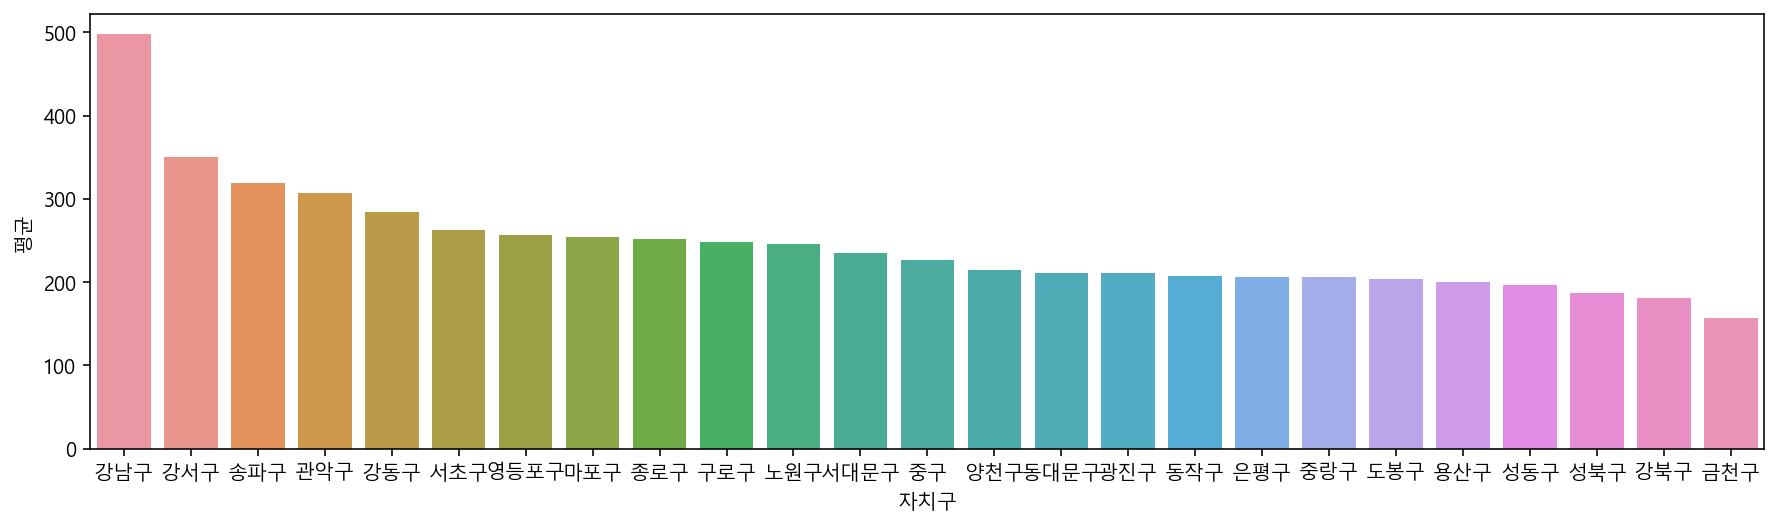

In [79]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_fire1, x=df_fire1.index, y="평균")
plt.savefig("화재발생 평균")

### 구별 인구대비 화재발생 (만명당)

In [80]:
df_fire2 = pd.concat([df_fire1, df_pl["인구"]],axis=1)

In [81]:
df_fire2["인구대비 화재발생"] = df_fire2["평균"]/df_fire2["인구"]*10000
df_fire2

,2015,2016,2017,2018,2019,평균,인구,인구대비 화재발생
강남구,504,589,502,436,456,497.4,544055,9.142458
강서구,301,372,364,383,331,350.2,585901,5.977119
송파구,278,325,318,340,335,319.2,673926,4.736425
관악구,285,314,286,337,311,306.6,509803,6.014088
강동구,264,311,269,324,254,284.4,463998,6.129337
서초구,303,286,242,242,242,263.0,429025,6.130179
영등포구,243,280,239,258,265,257.0,407367,6.308808
마포구,251,283,235,254,246,253.8,381858,6.646450
종로구,260,276,234,254,232,251.2,158996,15.799140
구로구,221,247,260,263,247,247.6,432488,5.725014


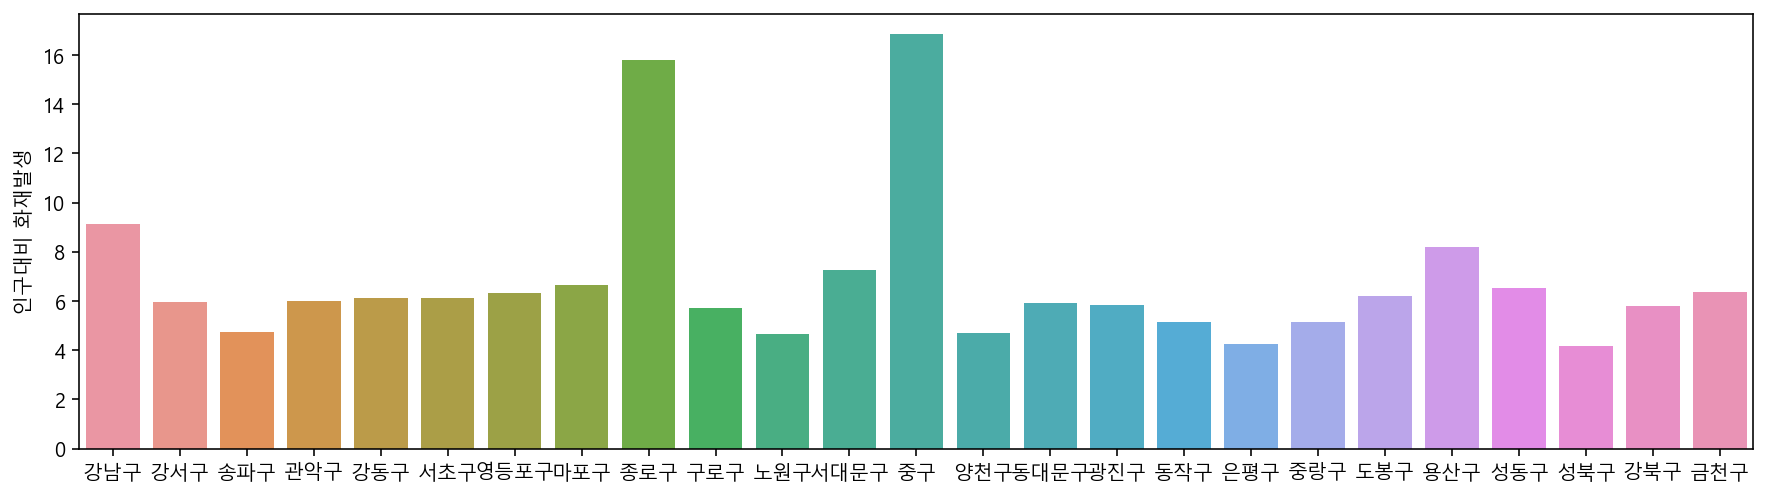

In [82]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_fire2, x=df_fire2.index, y="인구대비 화재발생")
plt.savefig("인구대비 화재발생")

### 중구 종로구 제외하면

In [83]:
df_fire3 = df_fire2.drop(["중구","종로구"])

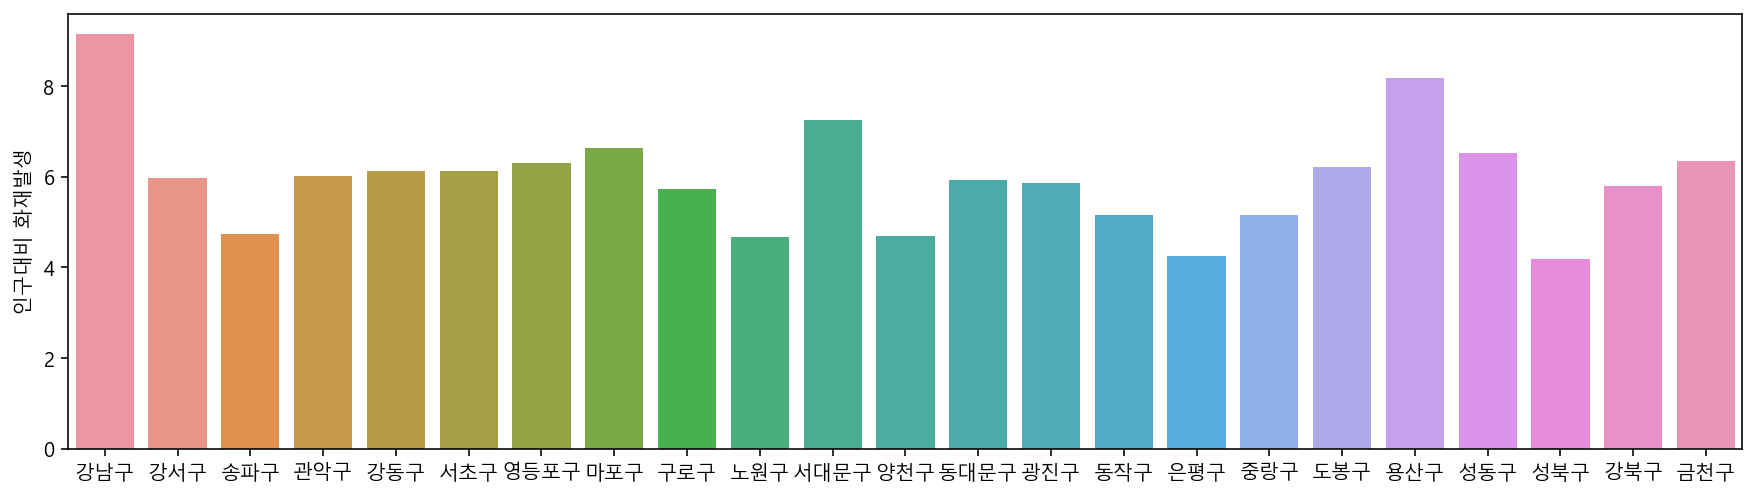

In [84]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_fire3, x=df_fire3.index, y="인구대비 화재발생")
plt.savefig("인구대비 화재발생(종로구,중구 제외)")

## 구별 피해액

<AxesSubplot:xlabel='자치구', ylabel='평균'>

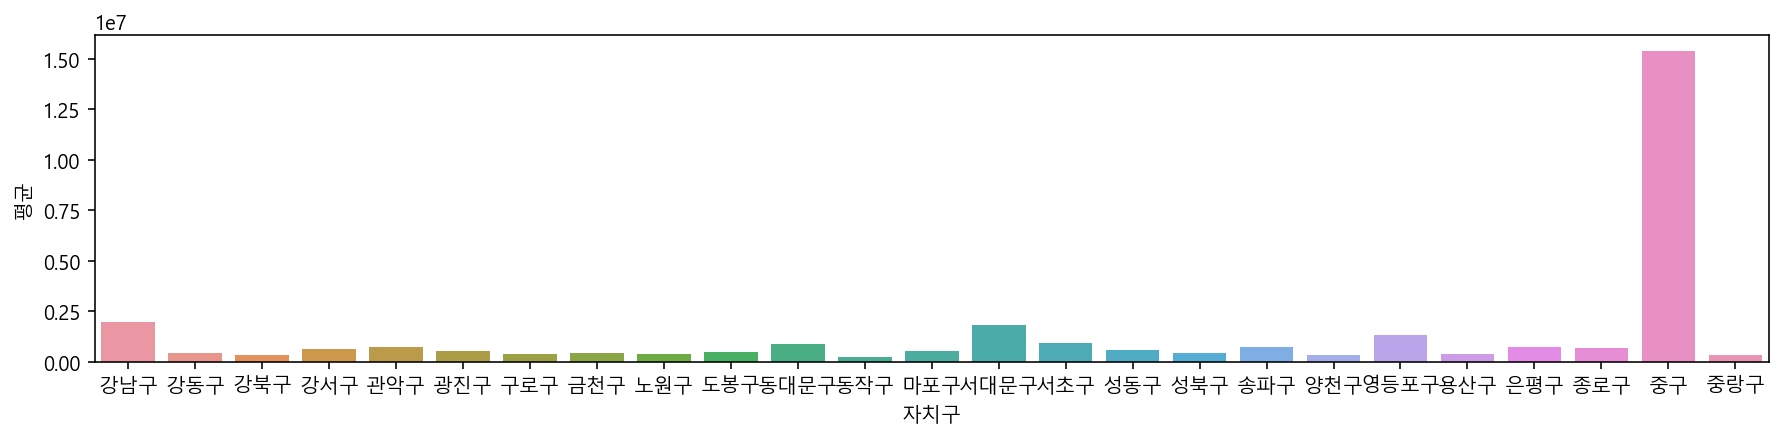

In [85]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_dam, x=df_dam.index, y="평균", ci=None)

In [86]:
fire5.loc[fire5["자치구"]=="합계"]

,기간,자치구,발생,피해액,인명피해
1,2015,합계,5921,14337272,249
27,2016,합계,6443,14154490,276
53,2017,합계,5978,15323890,283
79,2018,합계,6368,21239984,360
105,2019,합계,5881,92409010,398


In [87]:
fire_new = fire5.drop(fire5.loc[fire5["자치구"]=="합계"].index)

In [88]:
fire_new

,기간,자치구,발생,피해액,인명피해
2,2015,종로구,260,566923,9
3,2015,중구,237,570265,2
4,2015,용산구,187,402794,3
5,2015,성동구,197,399265,5
6,2015,광진구,241,584151,13
...,...,...,...,...,...
126,2019,관악구,311,654586,9
127,2019,서초구,242,970247,44
128,2019,강남구,456,1677681,24
129,2019,송파구,335,958829,21


<AxesSubplot:xlabel='자치구', ylabel='피해액'>

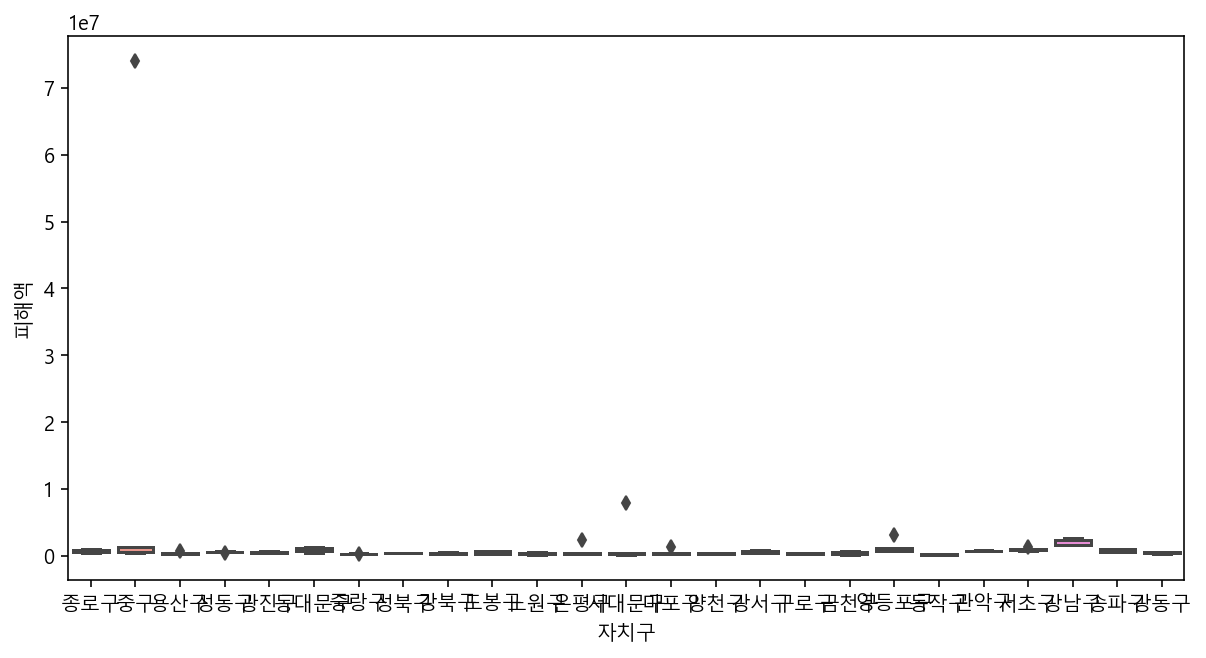

In [89]:
plt.figure(figsize=(10,5))
sns.boxplot(data=fire_new, x="자치구", y="피해액")

<AxesSubplot:xlabel='자치구', ylabel='피해액'>

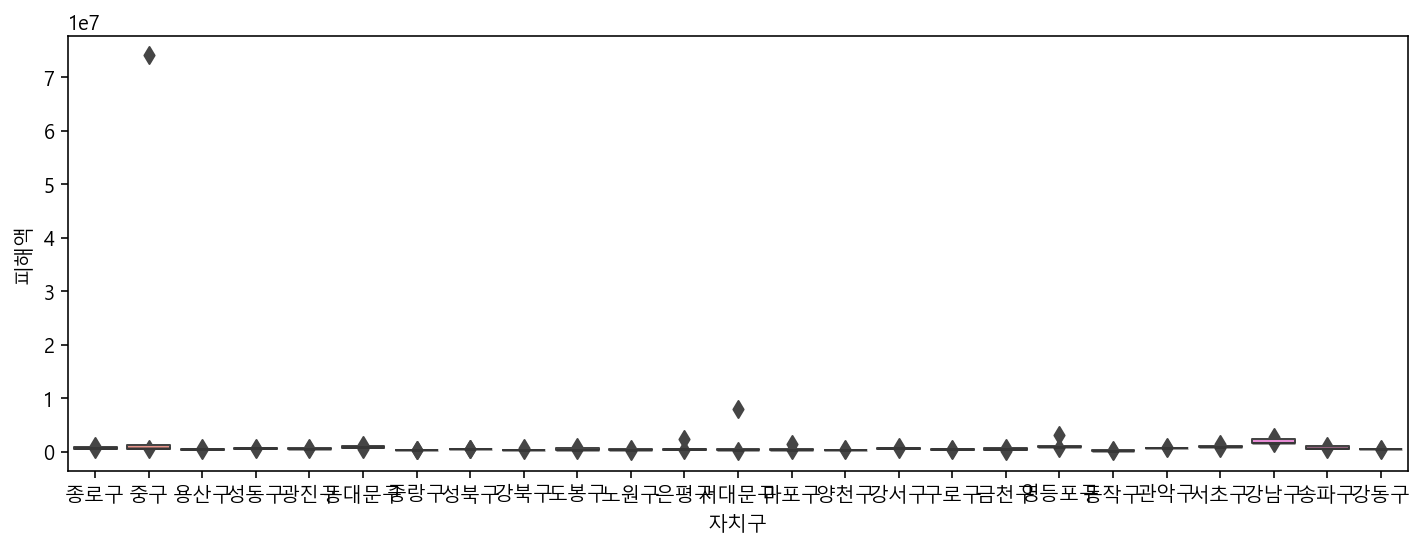

In [90]:
plt.figure(figsize=(12,4))
sns.boxenplot(data=fire_new, x="자치구", y="피해액")

<Figure size 720x360 with 0 Axes>

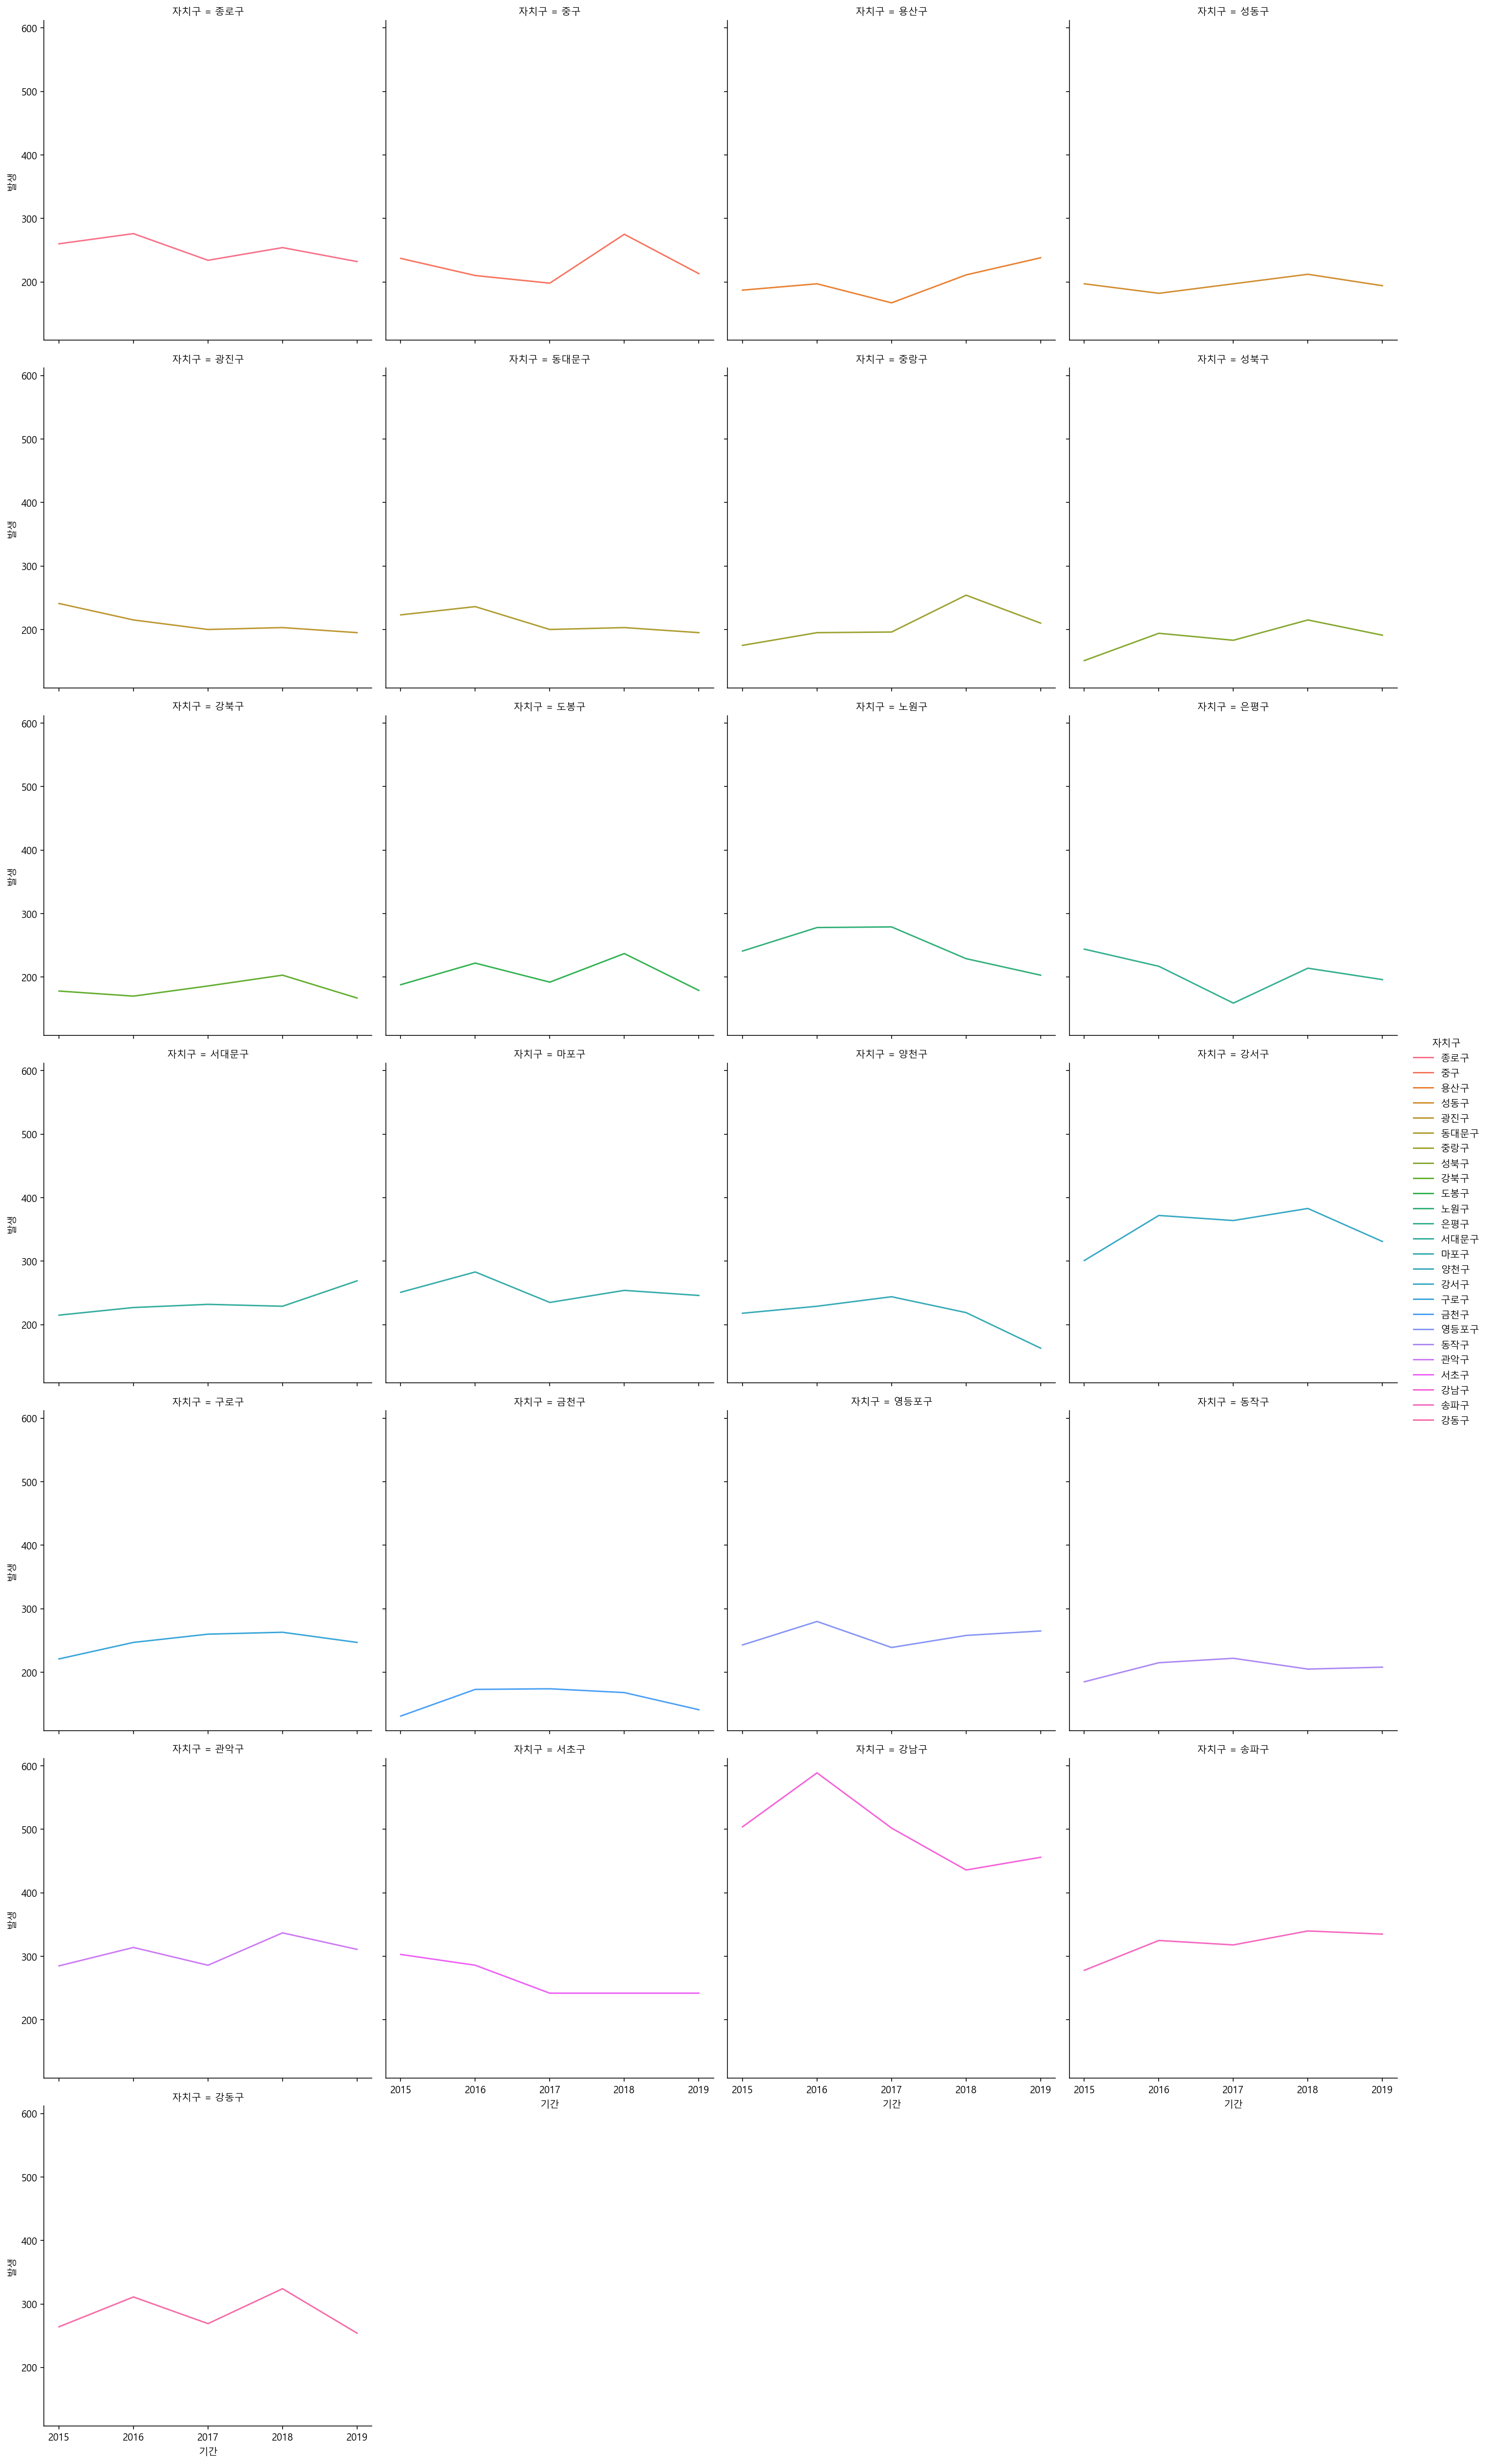

In [91]:
plt.figure(figsize=(10,5))
sns.relplot(data=fire_new, x="기간", y="발생", hue="자치구",
           kind="line", col="자치구", col_wrap=4)
plt.show()

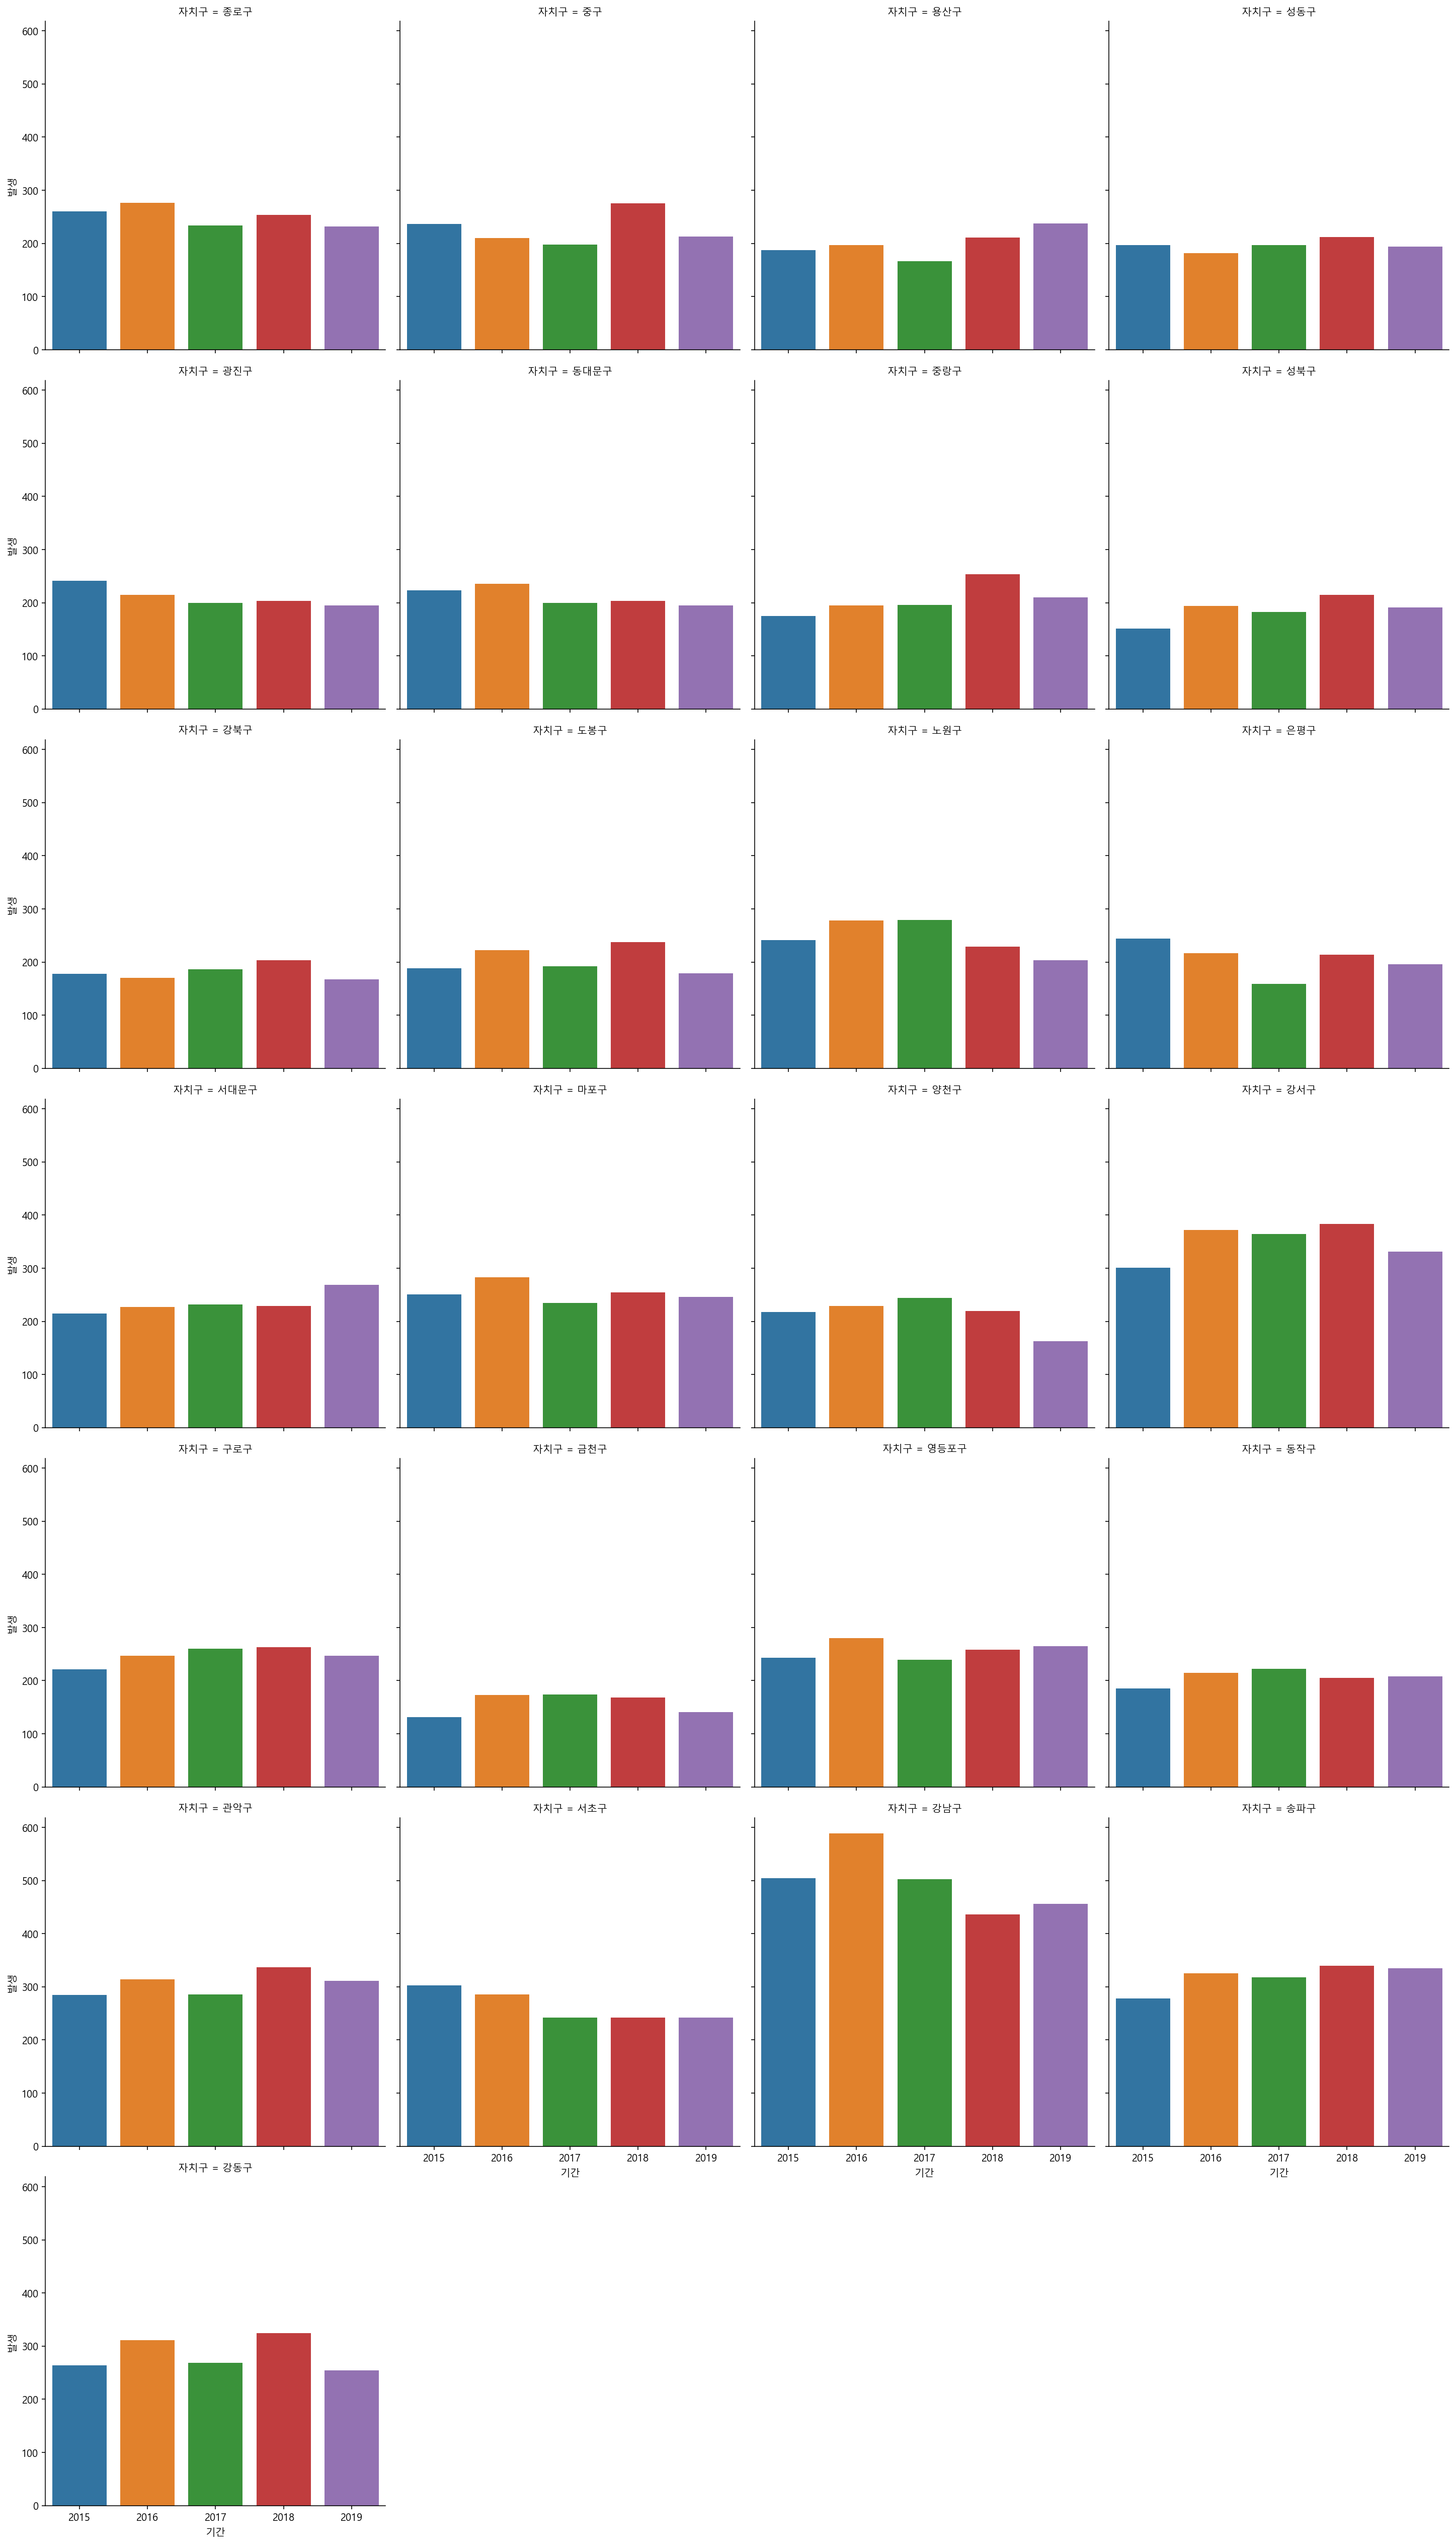

In [92]:
sns.catplot(data=fire_new, x="기간",y="발생", kind="bar", col="자치구", col_wrap=4)

### 구별 피해액(중구 빼고, 중구 평화시장 화재)

In [93]:
df_dam1 = df_dam.drop(["중구"])

<AxesSubplot:xlabel='자치구', ylabel='평균'>

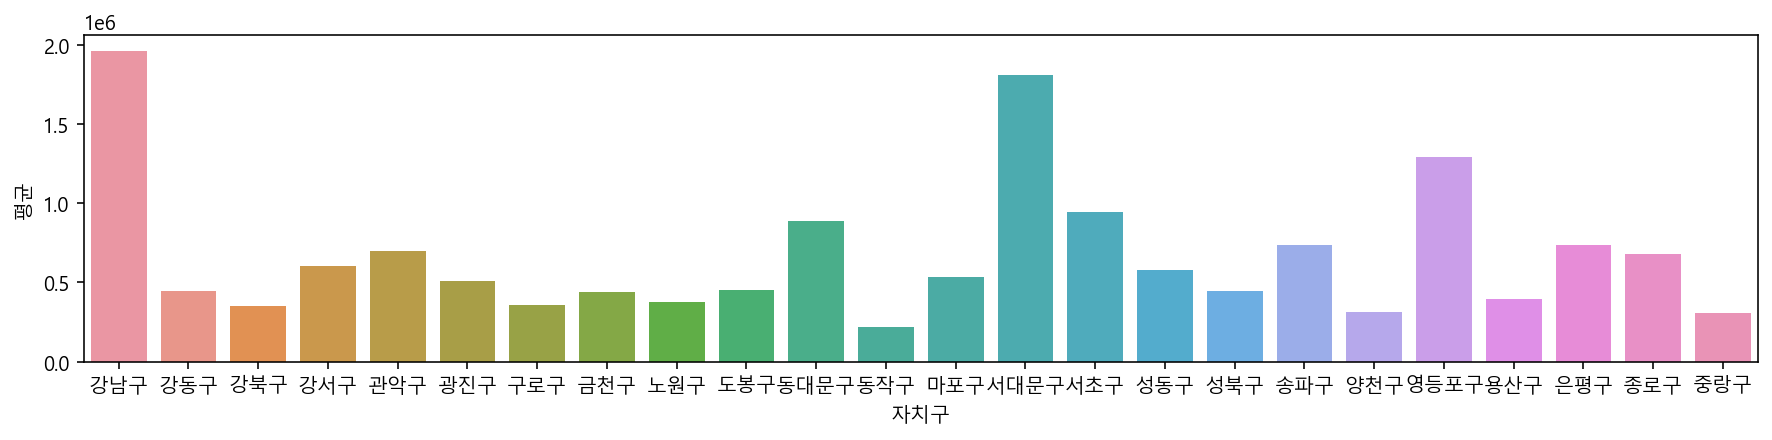

In [94]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_dam1, x=df_dam1.index, y="평균", ci=None)

### 구별 인구대비 피해액

In [95]:
df_dam2 = pd.concat([df_dam, df_pl["인구"]],axis=1)
df_dam2

,2015,2016,2017,2018,2019,평균,인구
자치구,,,,,,,
강남구,2645324,2303012,1565258,1624983,1677681,1963251.6,544055
강동구,329917,420875,418593,540625,533359,448673.8,463998
강북구,593257,382715,339146,216838,217805,349952.2,311569
강서구,404432,851150,706871,393401,666297,604430.2,585901
관악구,721101,653587,654690,816562,654586,700105.2,509803
광진구,584151,477460,433742,658185,392843,509276.2,360109
구로구,233909,438208,460568,239327,411829,356768.2,432488
금천구,542211,172424,605549,203806,671767,439151.4,247835
노원구,436980,350936,566821,331000,185642,374275.8,527032


In [96]:
df_dam2["인구대비 피해액"] = df_dam2["평균"]/df_dam2["인구"]
df_dam2

,2015,2016,2017,2018,2019,평균,인구,인구대비 피해액
자치구,,,,,,,,
강남구,2645324,2303012,1565258,1624983,1677681,1963251.6,544055,3.608554
강동구,329917,420875,418593,540625,533359,448673.8,463998,0.966974
강북구,593257,382715,339146,216838,217805,349952.2,311569,1.123193
강서구,404432,851150,706871,393401,666297,604430.2,585901,1.031625
관악구,721101,653587,654690,816562,654586,700105.2,509803,1.373286
광진구,584151,477460,433742,658185,392843,509276.2,360109,1.414228
구로구,233909,438208,460568,239327,411829,356768.2,432488,0.824920
금천구,542211,172424,605549,203806,671767,439151.4,247835,1.771951
노원구,436980,350936,566821,331000,185642,374275.8,527032,0.710158


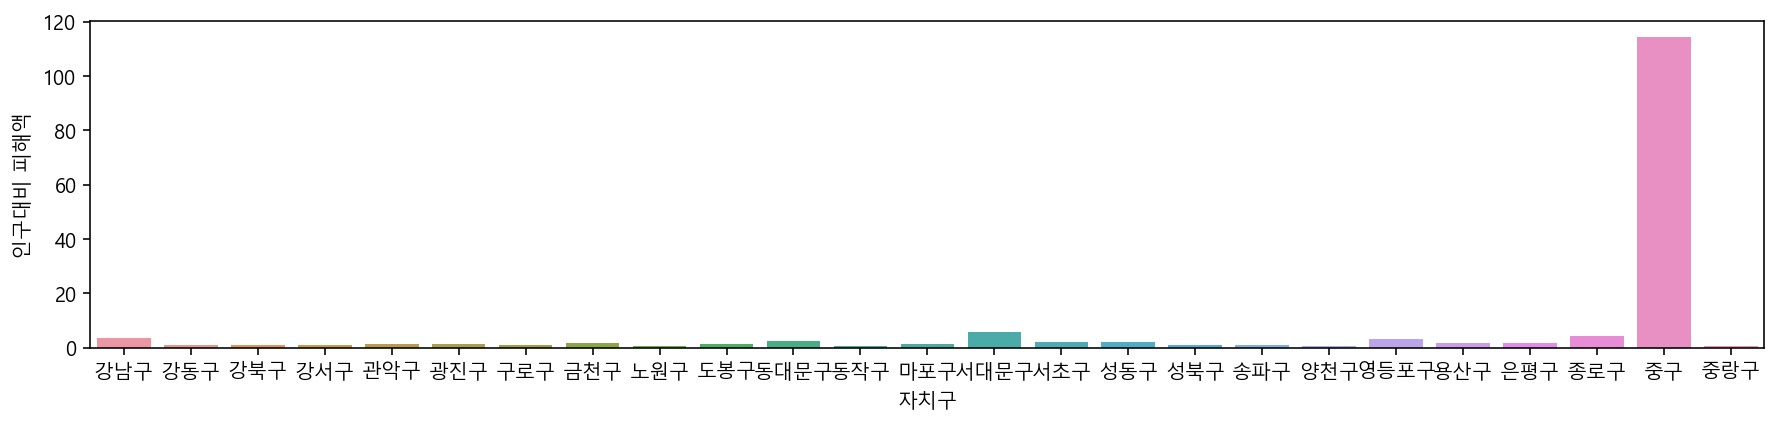

In [97]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_dam2, x=df_dam2.index, y="인구대비 피해액", ci=None)
plt.savefig("인구대비 피해액(중구 포함)")

### 구별 인구대비 피해액 (중구 제외)

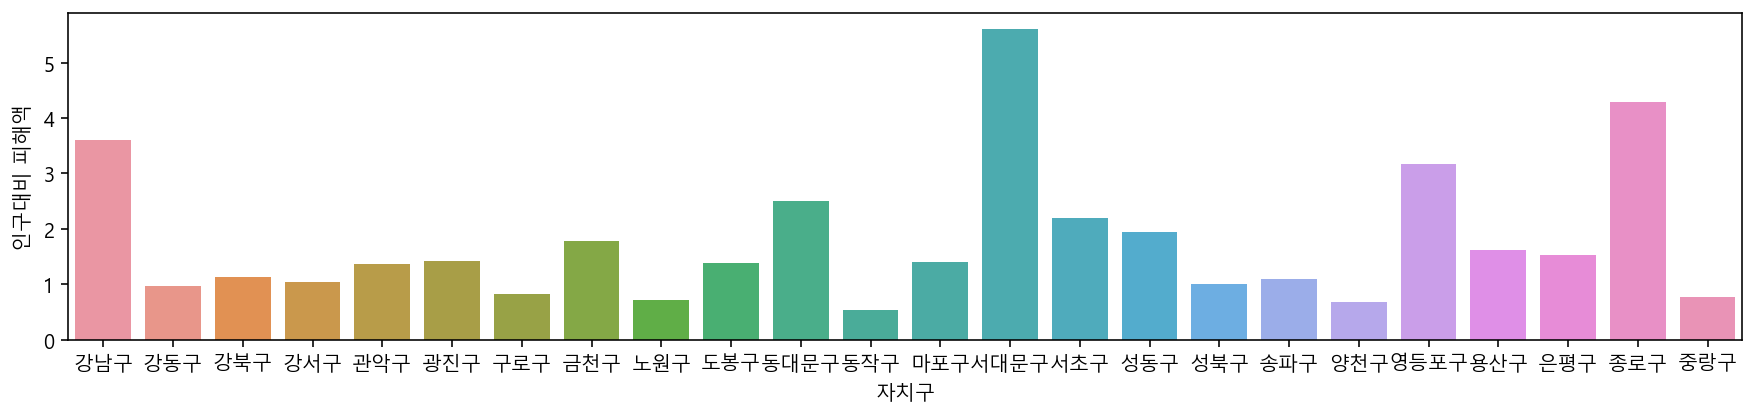

In [98]:
df_dam3 = df_dam2.drop(["중구"])
plt.figure(figsize=(15,3))
sns.barplot(data=df_dam3, x=df_dam3.index, y="인구대비 피해액", ci=None)
plt.savefig("인구대비 피해액(중구 제외)")

## 구별 고령자

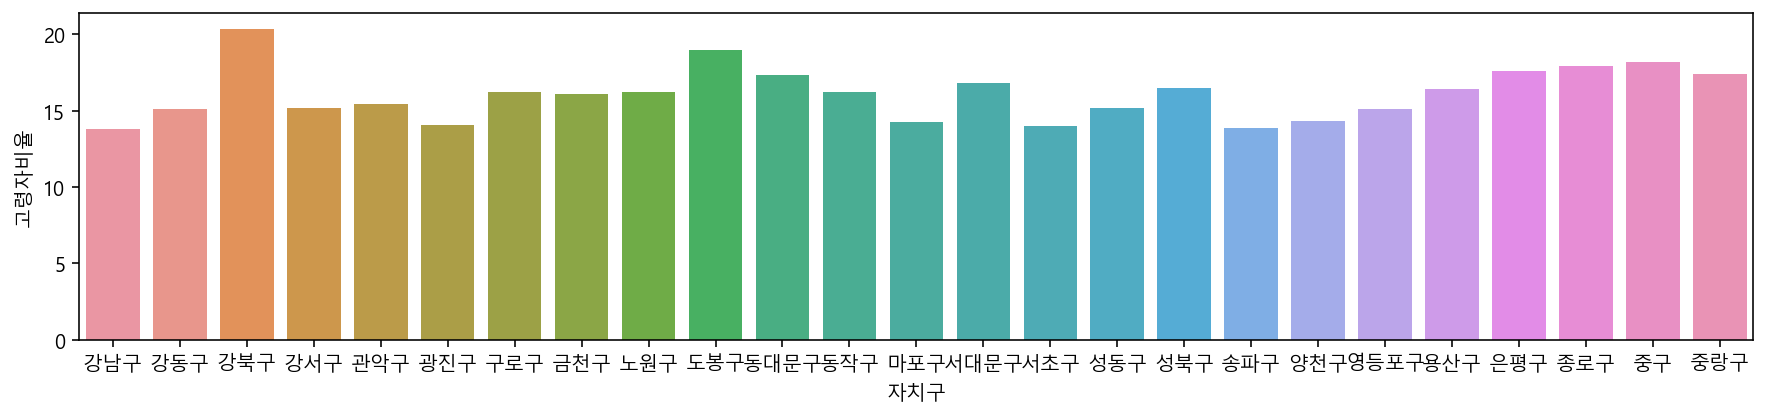

In [99]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_pl, x=df_pl.index, y="고령자비율", ci=None)
plt.savefig("고령자비율")

## 구별 노후시설

<AxesSubplot:xlabel='자치구', ylabel='30년 이상'>

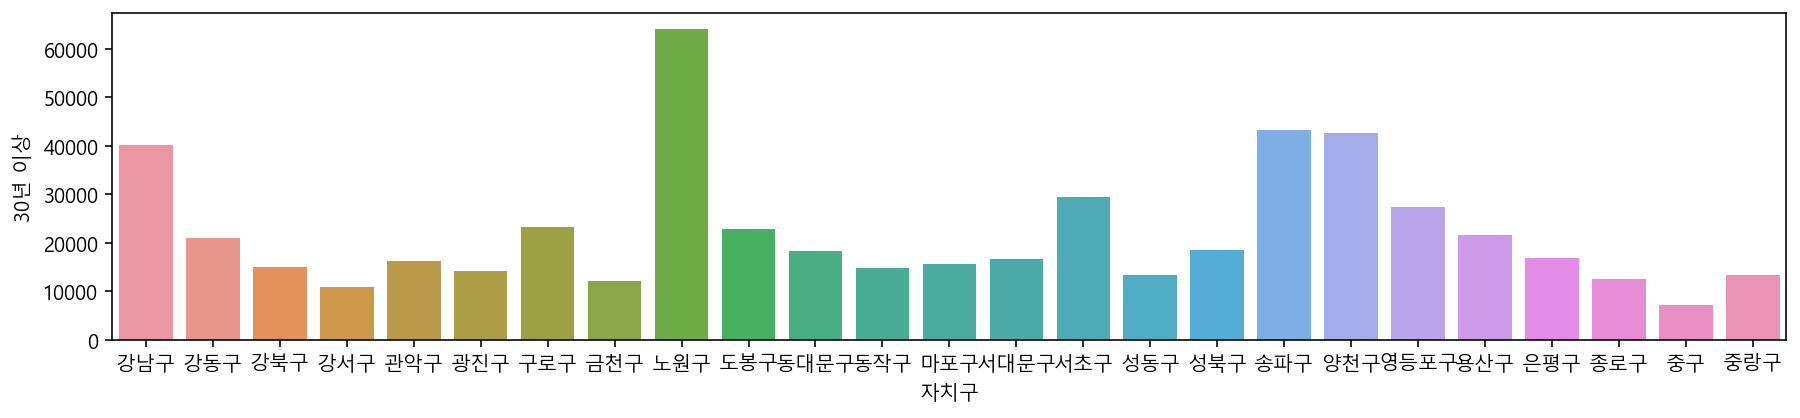

In [100]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_bd, x=df_bd.index, y="30년 이상", ci=None)

### 구별 인구대비 노후시설

In [101]:
df_bd1 = pd.concat([df_bd, df_pl["인구"]],axis=1)
df_bd1

,30년 이상,인구
자치구,,
강남구,40192,544055
강동구,20878,463998
강북구,15064,311569
강서구,10898,585901
관악구,16167,509803
광진구,14134,360109
구로구,23250,432488
금천구,12166,247835
노원구,64108,527032


In [102]:
df_bd1["인구대비 노후시설"] = df_bd1["30년 이상"]/df_bd1["인구"]*100
df_bd1

,30년 이상,인구,인구대비 노후시설
자치구,,,
강남구,40192,544055,7.387488
강동구,20878,463998,4.499588
강북구,15064,311569,4.834884
강서구,10898,585901,1.860041
관악구,16167,509803,3.171225
광진구,14134,360109,3.924923
구로구,23250,432488,5.375872
금천구,12166,247835,4.908911
노원구,64108,527032,12.163967


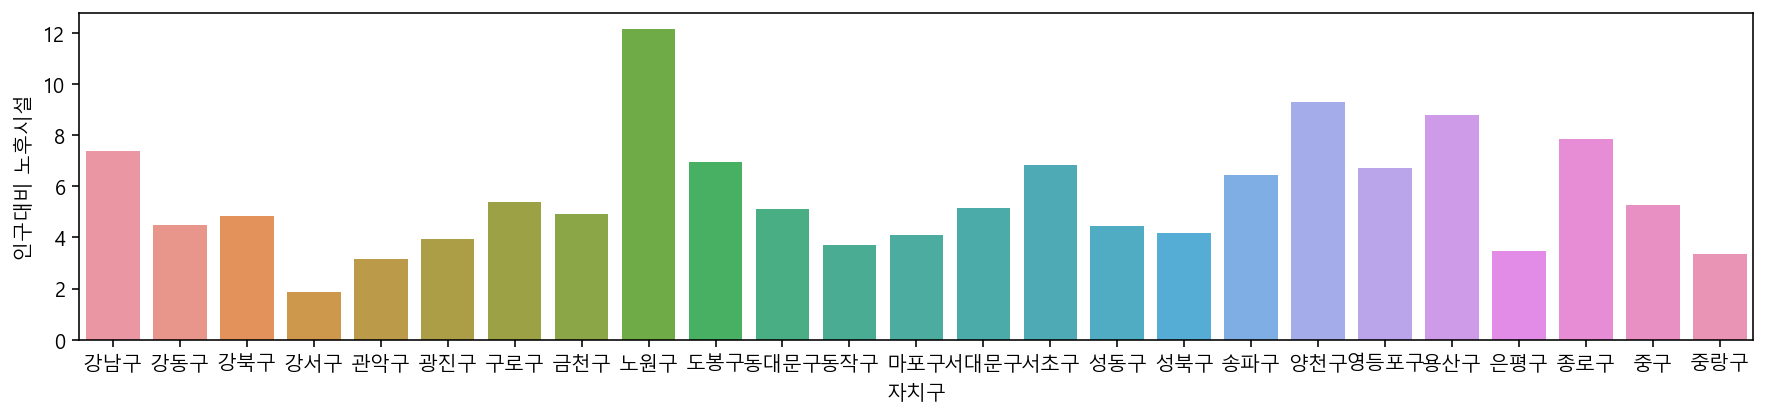

In [103]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_bd1, x=df_bd1.index, y="인구대비 노후시설", ci=None)
plt.savefig("인구대비 노후시설")

## 구별 소방서

## 안전센터 수

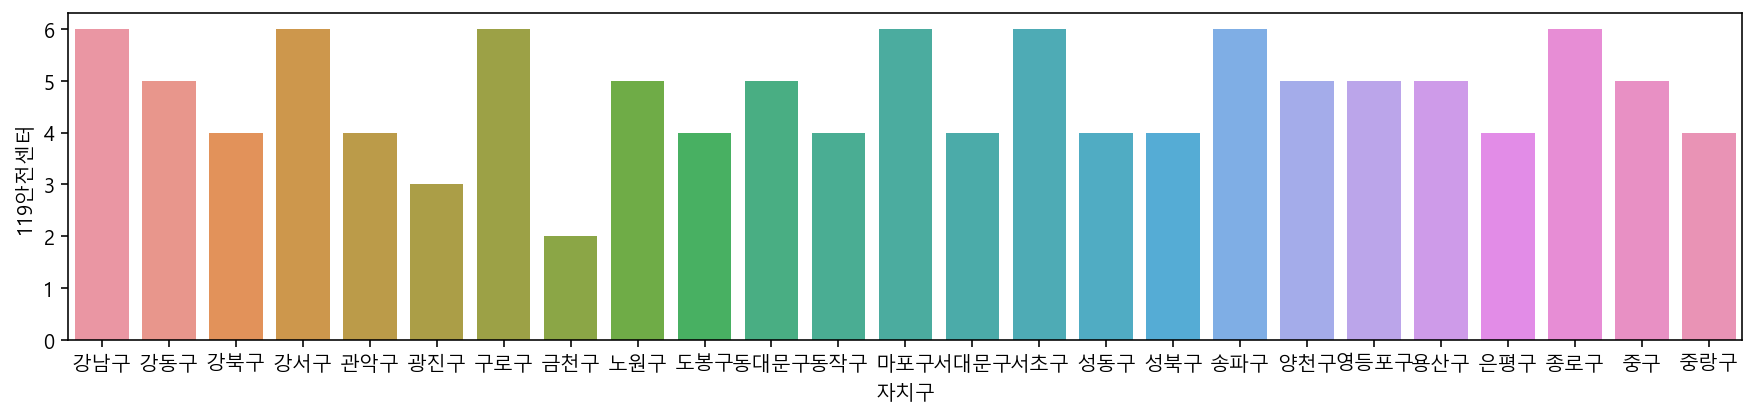

In [104]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_119, x=df_119.index, y="119안전센터", ci=None)
plt.savefig("119안전센터")

## 안전센터 당 담당인구

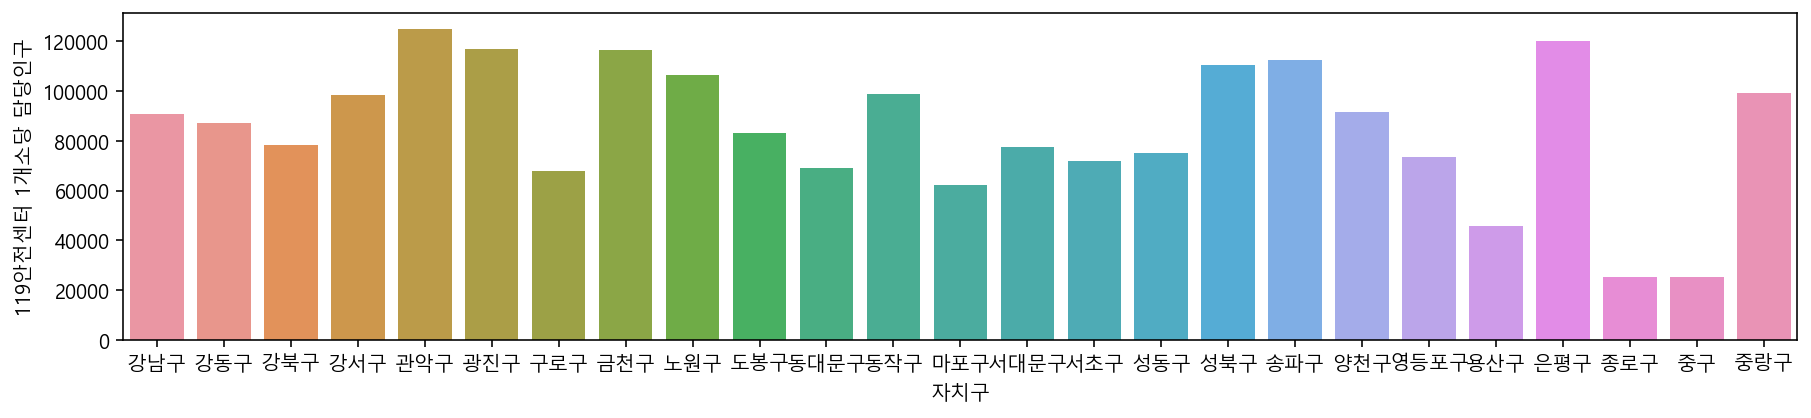

In [105]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_119, x=df_119.index, y="119안전센터 1개소당 담당인구", ci=None)
plt.savefig("119안전센터 1개소당 담당인구")

## 구별 기초생활 수급자

In [106]:
df_low1 = pd.concat([df_low, df_pl["인구"]],axis=1)
df_low1

,총 수급자,인구
자치구,,
강남구,14660,544055
강동구,14698,463998
강북구,19846,311569
강서구,27797,585901
관악구,20517,509803
광진구,11864,360109
구로구,12329,432488
금천구,11637,247835
노원구,31054,527032


In [107]:
df_low1["인구대비 수급자"] = df_low1["총 수급자"]/df_low1["인구"]*100
df_low1

,총 수급자,인구,인구대비 수급자
자치구,,,
강남구,14660,544055,2.694581
강동구,14698,463998,3.167686
강북구,19846,311569,6.369697
강서구,27797,585901,4.744317
관악구,20517,509803,4.024496
광진구,11864,360109,3.294558
구로구,12329,432488,2.850715
금천구,11637,247835,4.695463
노원구,31054,527032,5.892242


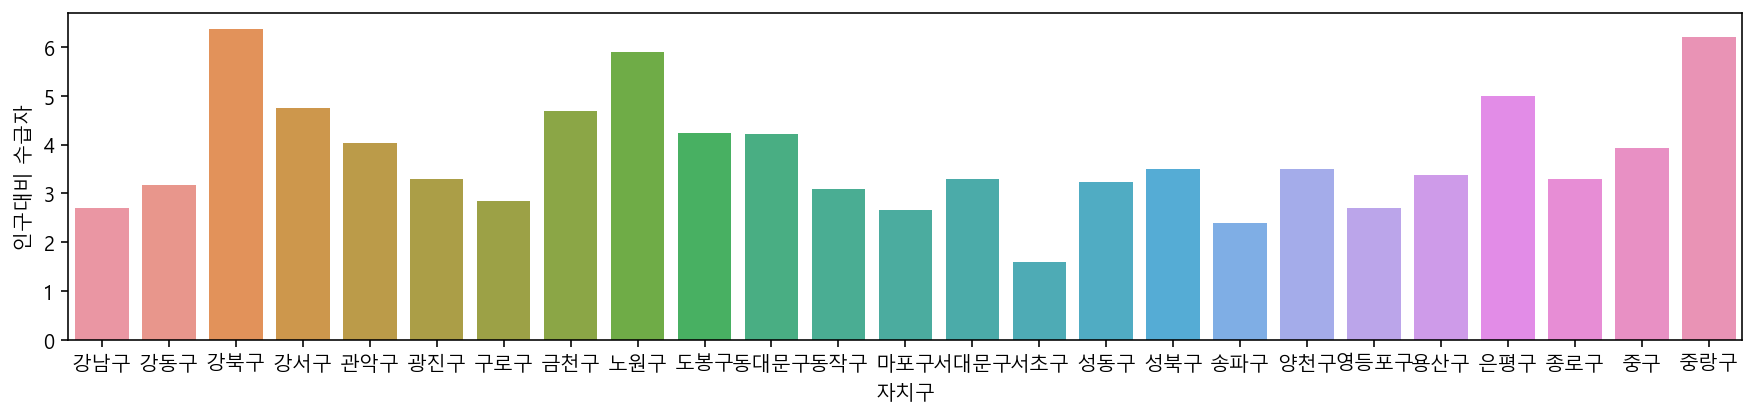

In [108]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_low1, x=df_low1.index, y="인구대비 수급자", ci=None)
plt.savefig("인구대비 수급자")

## 인구대비 소방용수시설 

In [109]:
df_fc1 = pd.concat([df_fc, df_pl["인구"]],axis=1)
df_fc1["인구대비 소방용수시설"] = df_fc1["소방용수시설"]/df_low1["인구"]*10000
df_fc1["인구대비 비상소화장치"] = df_fc1["비상소화장치"]/df_low1["인구"]*10000
df_fc1

,비상소화장치,소방용수시설,인구,인구대비 소방용수시설,인구대비 비상소화장치
자치구,,,,,
강남구,65,3651,544055,67.107186,1.194732
강동구,96,2429,463998,52.349364,2.068974
강북구,95,1829,311569,58.702888,3.049084
강서구,47,2605,585901,44.461436,0.802183
관악구,177,2747,509803,53.883559,3.471929
광진구,63,1570,360109,43.597911,1.749470
구로구,75,1743,432488,40.301696,1.734152
금천구,30,1356,247835,54.713822,1.210483
노원구,47,2436,527032,46.221102,0.891786


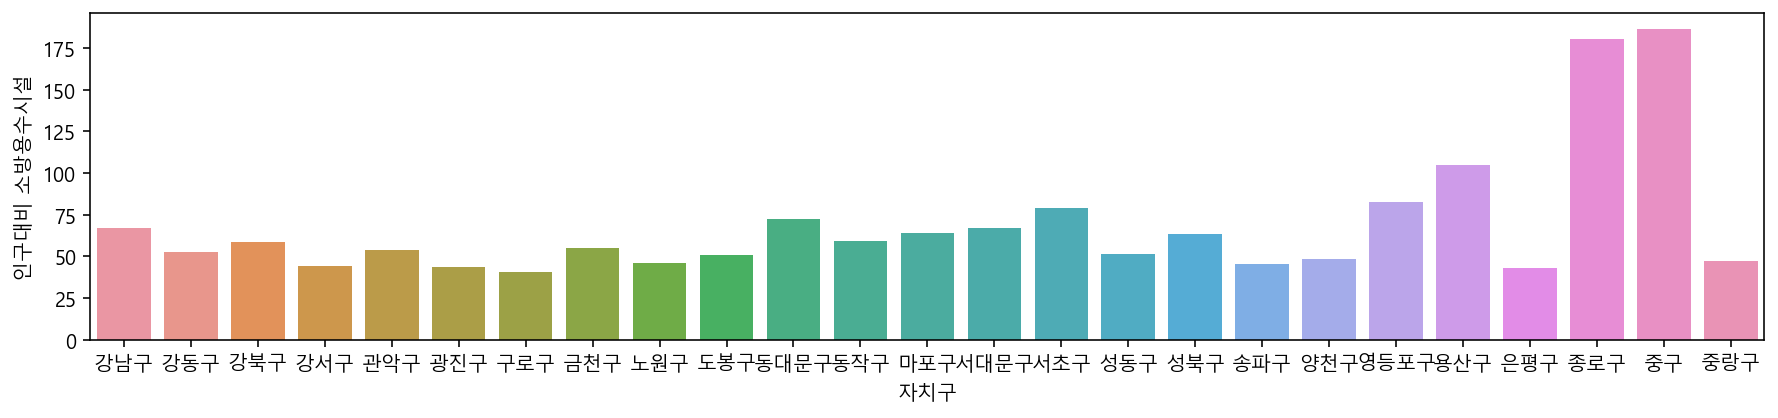

In [110]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_fc1, x=df_fc1.index, y="인구대비 소방용수시설", ci=None)
plt.savefig("인구대비 소방용수시설")

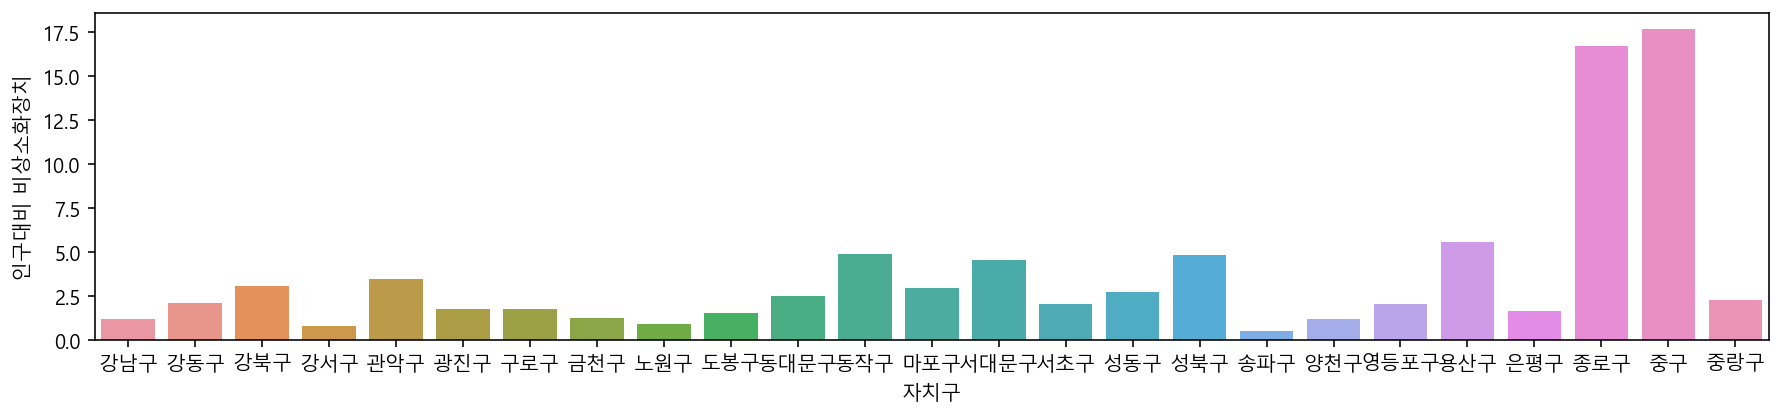

In [111]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_fc1, x=df_fc1.index, y="인구대비 비상소화장치", ci=None)
plt.savefig("인구 대비 비상소화장치")

In [112]:
df_fc2 =df_fc1.drop(["종로구","중구"])
df_fc2

,비상소화장치,소방용수시설,인구,인구대비 소방용수시설,인구대비 비상소화장치
자치구,,,,,
강남구,65,3651,544055,67.107186,1.194732
강동구,96,2429,463998,52.349364,2.068974
강북구,95,1829,311569,58.702888,3.049084
강서구,47,2605,585901,44.461436,0.802183
관악구,177,2747,509803,53.883559,3.471929
광진구,63,1570,360109,43.597911,1.749470
구로구,75,1743,432488,40.301696,1.734152
금천구,30,1356,247835,54.713822,1.210483
노원구,47,2436,527032,46.221102,0.891786


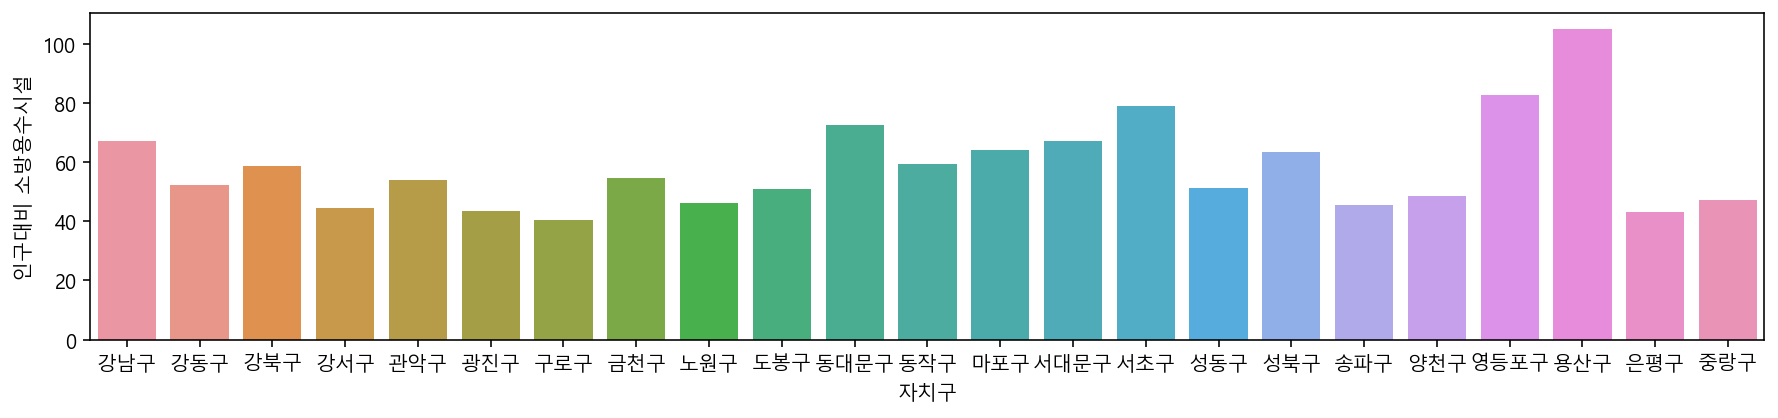

In [113]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_fc2, x=df_fc2.index, y="인구대비 소방용수시설", ci=None)
plt.savefig("인구대비 소방용수시설2")

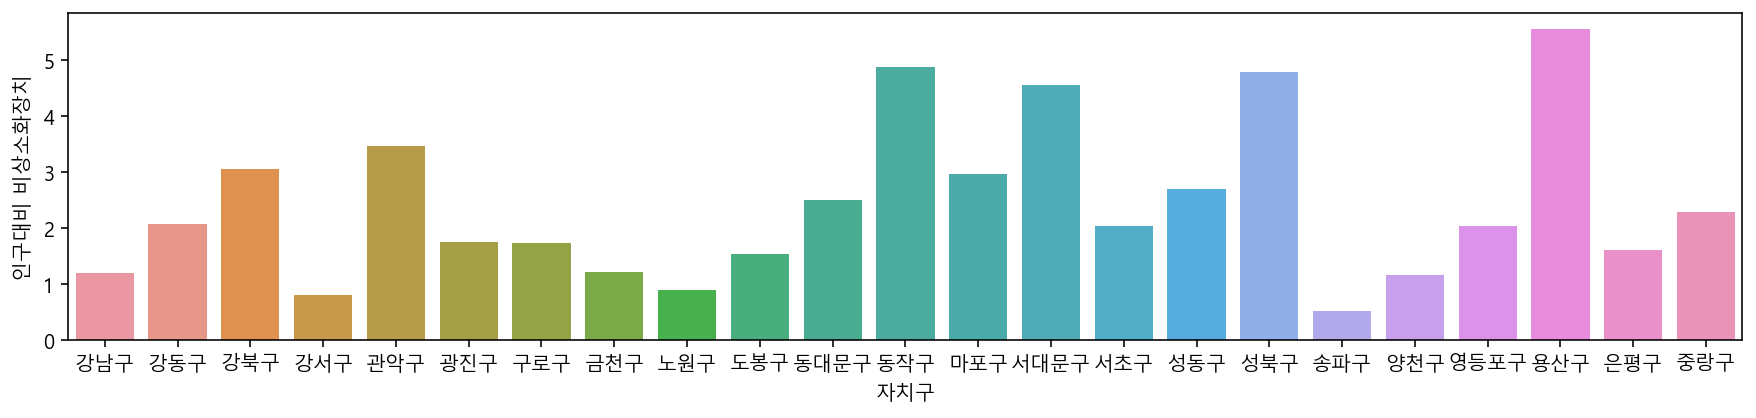

In [114]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_fc2, x=df_fc2.index, y="인구대비 비상소화장치", ci=None)
plt.savefig("인구 대비 비상소화장치2")

In [115]:
df_fire1

기간,2015,2016,2017,2018,2019,평균
자치구,,,,,,
강남구,504,589,502,436,456,497.4
강서구,301,372,364,383,331,350.2
송파구,278,325,318,340,335,319.2
관악구,285,314,286,337,311,306.6
강동구,264,311,269,324,254,284.4
서초구,303,286,242,242,242,263.0
영등포구,243,280,239,258,265,257.0
마포구,251,283,235,254,246,253.8
종로구,260,276,234,254,232,251.2


# 지도

In [116]:
import folium
import json

In [117]:
df_fire2

,2015,2016,2017,2018,2019,평균,인구,인구대비 화재발생
강남구,504,589,502,436,456,497.4,544055,9.142458
강서구,301,372,364,383,331,350.2,585901,5.977119
송파구,278,325,318,340,335,319.2,673926,4.736425
관악구,285,314,286,337,311,306.6,509803,6.014088
강동구,264,311,269,324,254,284.4,463998,6.129337
서초구,303,286,242,242,242,263.0,429025,6.130179
영등포구,243,280,239,258,265,257.0,407367,6.308808
마포구,251,283,235,254,246,253.8,381858,6.646450
종로구,260,276,234,254,232,251.2,158996,15.799140
구로구,221,247,260,263,247,247.6,432488,5.725014


## 인구대비 화재발생

In [118]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(location=[37.562225, 126.978555],
               tiles = "Stamen Toner",
               zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_fire2,
    columns=[df_fire2.index, "인구대비 화재발생"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m

### 중구 종로구 제외하면

In [119]:
m = folium.Map(location=[37.562225, 126.978555],
               tiles = "Stamen Toner",
               zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_fire3,
    columns=[df_fire3.index, "인구대비 화재발생"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m

## 인구대비 피해액 (중구 빼고)

In [120]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(location=[37.562225, 126.978555],
               tiles = "Stamen Toner",
               zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_dam3,
    columns=[df_dam3.index, "인구대비 피해액"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m


## 안전센터 당 담당인구

In [121]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(location=[37.562225, 126.978555],
               tiles = "Stamen Toner",
               zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_119,
    columns=[df_119.index, "119안전센터 1개소당 담당인구"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m


## 구별 고령자 비율

In [122]:
m = folium.Map(location=[37.562225, 126.978555],
               tiles = "Stamen Toner",
               zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_pl,
    columns=[df_pl.index, "고령자비율"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m

## 인구대비 노후시설

In [123]:
m = folium.Map(location=[37.562225, 126.978555],
               tiles = "Stamen Toner",
               zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_bd1,
    columns=[df_bd1.index, "인구대비 노후시설"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m

## 인구대비 수급자

In [124]:
m = folium.Map(location=[37.562225, 126.978555],
               tiles = "Stamen Toner",
               zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_low1,
    columns=[df_low1.index, "인구대비 수급자"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m

## 인구대비 소방용수시설

In [125]:
m = folium.Map(location=[37.562225, 126.978555],
               tiles = "Stamen Toner",
               zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_fc1,
    columns=[df_fc1.index, "인구대비 소방용수시설"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m

## 인구대비 비상소화장치

In [126]:
m = folium.Map(location=[37.562225, 126.978555],
               tiles = "Stamen Toner",
               zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_fc1,
    columns=[df_fc1.index, "인구대비 비상소화장치"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m

# 기타

In [127]:
m = folium.Map(location=[37.562225, 126.978555],
               tiles = "Stamen Toner",
               zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_pl,
    columns=[df_pl.index, "고령자비율"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m

In [128]:
m = folium.Map(location=[37.562225, 126.978555],
               tiles = "Stamen Toner",
               zoom_start=11)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_pl,
    columns=[df_pl.index, "인구"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)
m